# Reseach of sale advertisements of apartments in St. Petersburg, Russia

The data is collected from Yandex.RealEstate service - an archive of ads for the sale of apartments in St. Petersburg and nearest towns for several years. We need to learn how to determine the market value of real estate. Our job is to set the parameters. This will help to build an automated system in the future for tracking anomalies and market frauds.

Two types of data are available for each apartment for sale. The first one is entered by the user manually, the second one is obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and the river.

### 1. Open the file and get a general infomation about the dataset.

In [50]:
import pandas as pd
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/project-2_real_estate_SPb/real_estate_data.csv')
print(data.sample(10))

      total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
309    8\t4800000.0\t58.0\t2018-02-01T00:00:00\t3\t\t...                                                                                                                                                                                                                                                                  
17014  0\t8990000.0\t64.0\t2017-10-02T00:00:00\t2\t\t...                                                                                                                                                                                                                                                                  
16464  14\t4150000.0\t34.4\t2019-01-10T00:00:00\t1\t2..

We can see that the data requires a separation sep='\t'

In [51]:
data = pd.read_csv('/Users/yuliabezginova/PycharmProjects/project-2_real_estate_SPb/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### 1.1 Изучим общую информацию о данных. Сверим, насколько формат данных соответствуют их описанию.

#### Описание переменных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

#### 1.2 Reconcile if the variables' desciption suits the data types

In [52]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**From the above output we can see that _non-null_ amount of inputs are different for different variable. From the maximum value we can conclude the number of observations in the dataset is 23699, however fro some variable (e.g., _'is_apartment'_, _'cityCenters_nearest'_, _'ponds_nearest'_ the number of observations is less. This means there are missings (NaN, None, empty cells) in the data.**

#### 1.3 Build histograms for each variable to get an overview of a raw data given

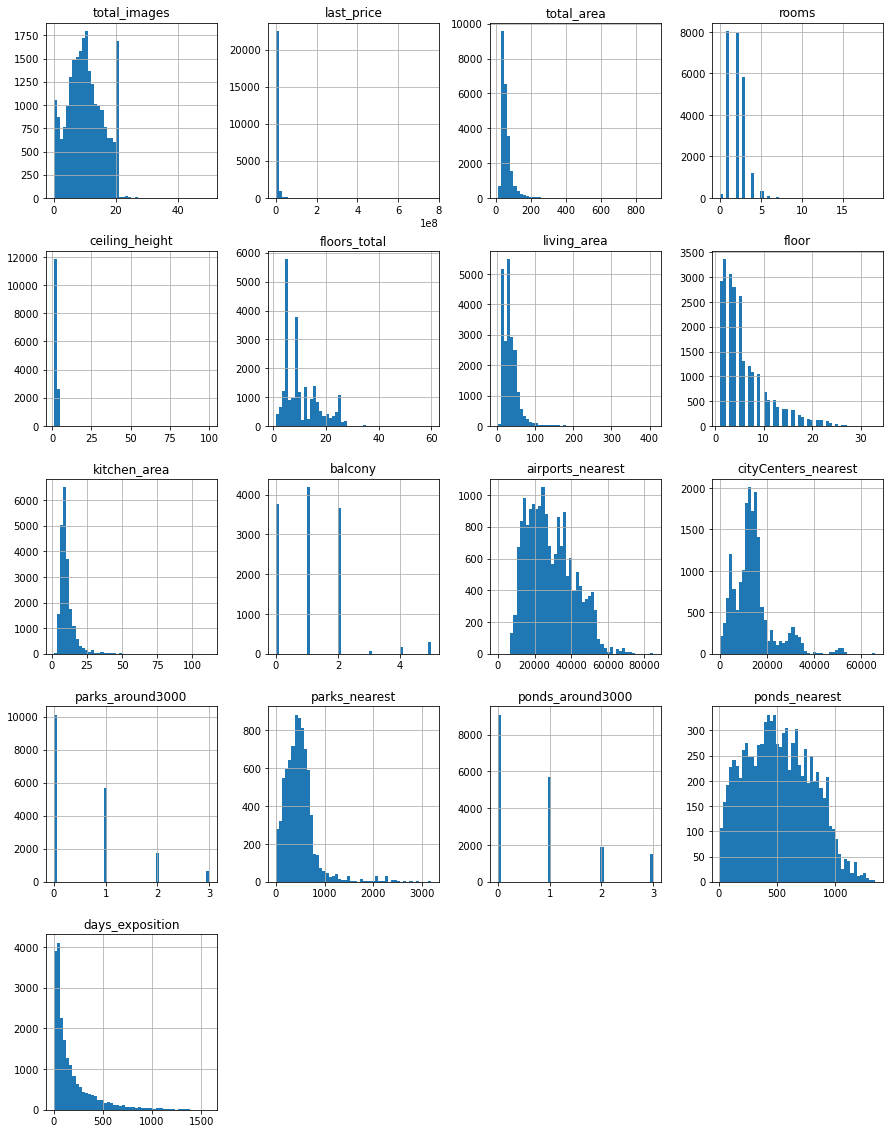

In [53]:
import pandas as pd
data.hist(bins=50, figsize=(15, 20));
None

**From the histogram we can see that some variables look not ok. E. g. 'total_images', 'floors_total', 'living_area' variables definitely contains outliers. This gives an idea that we have to preprocess and clean the data first.**

### 2. Data Proprocessing

#### 2.1 Finding missing values and filling them in

Values will be originally missing from a dataset or be a product of data conversion or data manipulation. 

Missing data can:
- hint at data collection errors;
- indicate improper conversion or manipulation;
- actually not being considered missing. 

_For some datasets, missing data can be listed as "zero", "false", "not applicable", "entered an empty string", amonth other posibilities._

**There are two common methods to indicate where values in the DataFrame are missing are _isna()_ and _isnull()_.**

In [54]:
len(data) # number of observations

23699

In [55]:
data['first_day_exposition'].head(5)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [56]:
data['date_time'] = pd.to_datetime(data['first_day_exposition'])
data['local_time'] = data['date_time'] + pd.Timedelta(hours=3)

print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

     locality_name  airports_nearest  cityCenters_nearest  parks_around3000  \
0  Санкт-Петербург           18863.0              16028

In [57]:
# to indicate where exactly missing values are we use .isna() method, we have 'False' values for missings.
data['total_images'].isna().head()

0    False
1    False
2    False
3    False
4    False
Name: total_images, dtype: bool

In [58]:
total_images_missing = data['total_images'].isna()

In [59]:
# look at the rows which contain NaN
data.loc[total_images_missing, :]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_time,local_time


In [60]:
data['total_images'].isna().sum()

0

In [61]:
# check each column in the DataFrame
data['last_price'].isna().sum()

0

In [62]:
data['total_area'].isna().sum()

0

In [63]:
data['first_day_exposition'].isna().sum()

0

In [64]:
data['rooms'].isna().sum()

0

In [65]:
data['cityCenters_nearest'].isna().sum()

5519

In [66]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))
data['cityCenters_nearest'].isna().sum() / len(data)

0.227604540275961

In [67]:
data['cityCenters_nearest'].isna().sum()

5394

_**When we encounter the missings in the DataFrame, we should decide how fill them in. From best practices in data science for this project we assume that if missings are less than 10% of total number of observations, we can remove them.**_

_Above we have already concluded that there are 23699 observations in the given dataset._

In [68]:
data['ceiling_height'].isna().sum() # missing values!

9195

In [69]:
# share of missings
data['ceiling_height'].isna().sum() / len(data)

0.38799105447487237

We can see that missing values' share is more than 10%, we thus have to fill missing values somehow.

In [70]:
# OPTION 1
#  filling missings with median value, grouping data logically
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['ceiling_height'].isna().sum()

156

In [71]:
# OPTION 2
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
             
# what is left unfilled with city median, we can fill in with median of the region median
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

Filling NaN of the distance from the city center to the apartment depending on the city. If there are some missings left, we fill them in with the median.

In [72]:
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[data['cityCenters_nearest'].isna() & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

In [73]:
# share of missings
data['ceiling_height'].isna().sum() / len(data)

0.0

Repeat filling in missings for each column by median or 0, logically grouping and making an assumption

In [74]:
data['floors_total'].isna().sum() # missing values!

86

In [75]:
# share of missings
data['floors_total'].isna().sum() / len(data)

0.0036288450989493226

In [76]:
data['living_area'].isna().sum() # missing values

1903

In [77]:
#  filling missings with median value, grouping data logically
data['living_area'] = data['living_area'].fillna(data.groupby('locality_name')['living_area'].transform('median'))
data['living_area'].isna().sum() # missing values

22

In [78]:
data['floor'].isna().sum() # ok

0

In [79]:
data['is_apartment'].isna().sum() # missing values!

20924

In [80]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [81]:
# Boolean type of variable can be filled with zeros, assuming if the client did not fill this tab, it probably means the flat is not commercial apartment type, but residential
data['is_apartment'].fillna(False, inplace=True)
data['is_apartment'].unique()

array([False,  True])

The boolean variable _'is_apartment'_ is now correctly filled in with _True_ or _False_ values.

In [82]:
data['kitchen_area'].isna().sum() # missing values!

2278

In [83]:
#  filling missings with median value, grouping data logically
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('locality_name')['kitchen_area'].transform('median'))
data['kitchen_area'].isna().sum()

28

In [84]:
data['balcony'].isna().sum() # missing values!

11519

In [85]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [86]:
# We assume that if the owner or his/her agent did not fill in the number of balconies field, there might be no balconies in the apartment at all.

In [87]:
data['balcony'].fillna(0, inplace=True)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

The variable _'balcony'_ is now filled in correctly.

In [88]:
data['locality_name'].isna().sum() # missing values!

49

In [89]:
data['airports_nearest'].isna().sum() # missing values!

5542

In [90]:
#  filling missings with median value, grouping data logically
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['airports_nearest'].isna().sum()

5394

In [91]:
data['parks_around3000'].isna().sum() # missing values!

5518

In [92]:
data['parks_around3000'] = data['parks_around3000'].fillna(data.groupby('locality_name')['parks_around3000'].transform('median'))
data['parks_around3000'].isna().sum()

5394

The variable _'parks_around3000'_ is not being filled in with the median. The reason might be is that grouping 'locality_name' does not work properly. We should consider this in the further analysis.

In [93]:
data['parks_nearest'].isna().sum() # missing values!

15620

In [94]:
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))
data['parks_nearest'].isna().sum()

6032

In [95]:
data['parks_nearest'].isna().sum() / len(data)

0.2545255074053758

We can see that most of missing values were filled in with the median. However, in the variable _'parks_nearest'_ there is still 25% of missing values left, which is more than 10% benchmark, we thus should consider this in further analysis.

In [96]:
data['ponds_around3000'].isna().sum() # missing values!

5518

In [97]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(data.groupby('locality_name')['ponds_around3000'].median())
data['ponds_around3000'].isna().sum()

5518

In [98]:
data['ponds_around3000'].isna().sum() / len(data)

0.232836828558167

In the variable _'ponds_around3000'_ there are 23% missings in the dataset, which should be considered in further analaysis.

In [99]:
data['ponds_nearest'].isna().sum() # missing values!

14589

In [100]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].median())
data['ponds_nearest'].isna().sum()

14589

In [101]:
data['ponds_nearest'].isna().sum() / len(data)

0.6155955947508334

In the variable _'ponds_nearest'_ there are 62% missings in the dataset, which should be considered in further analysis.

In [102]:
data['days_exposition'].isna().sum() # missing values!

3181

In [103]:
data['days_exposition'] = data['days_exposition'].fillna(data.groupby('locality_name')['days_exposition'].transform('median'))
data['days_exposition'].isna().sum()

81

In [104]:
data['days_exposition'].isna().sum() / len(data)

0.0034178657327313387

In the _'days_exposion'_ there are less than 3.4% missings, which is insignificant and can be safely removed.

In [105]:
data['cityCenters_nearest'].isna().sum() # missing values!

5394

In [106]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('mean'))
data['cityCenters_nearest'].isna().sum()

5394

In [107]:
data['cityCenters_nearest'].isna().sum() / len(data)

0.227604540275961

In the variable _'cityCenters_nearest'_ there are 23% missings, which is more than 10% benchmark and should be considered in further analysis.

**Missing values less than 10% in the dataset can be safely deleted as of they do not affect the results.**

In [108]:
data = data.dropna(subset=['kitchen_area', 'locality_name', 'living_area', 'ceiling_height', 'floors_total', 'days_exposition'])
print(data['kitchen_area'].isna().sum())
print(data['locality_name'].isna().sum())
print(data['living_area'].isna().sum())
print(data['ceiling_height'].isna().sum())
print(data['floors_total'].isna().sum())
print(data['ceiling_height'].isna().sum())
print(data['days_exposition'].isna().sum())

0
0
0
0
0
0
0


**All missings in the variables _'kitchen_area', 'locality_name', 'living_area', 'ceiling_height', 'floors_total', 'days_exposition'_ are removed.**

In [109]:
# data['kitchen_area'] = data['kitchen_area'].astype('int')
# data['floors_total'] = data['floors_total'].astype('int')
# data['living_area'] = data['living_area'].astype('int')
# data['balcony'] = data['balcony'].astype('int')
# data['airports_nearest'] = data['airports_nearest'].astype('int')
# data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')
# data['parks_around3000 '] = data['parks_around3000 '].astype('int')
# data['ponds_nearest'] = data['ponds_nearest'].astype('int')
# data['days_exposition'] = data['days_exposition'].astype('int')

**Missings were filled in as much as possible. Some NaNs are still left, but the share of them is insignificant, so we can leave as is and they are not trying to ruin results. Let's have a look how the data is now look like.**

In [110]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5282
cityCenters_nearest      5282
parks_around3000         5282
parks_nearest            5888
ponds_around3000         5404
ponds_nearest           14432
days_exposition             0
date_time                   0
local_time                  0
dtype: int64


From the final check of share of missings we can conclude that 6 variables contain 20-23% of missing values, which might be caused by manual mistakes, when people do not fill in these tabs while creating an ad:

- _'airports_nearest'_
- _'cityCenters_nearest'_
- _'parks_nearest'_
- _'parks_around3000'_
- _'ponds_around3000'_
- _'ponds_nearest'_

This bad data should be considered in further analysis.

### 2.2 Changing the type of data

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23467 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23467 non-null  int64         
 1   last_price            23467 non-null  float64       
 2   total_area            23467 non-null  float64       
 3   first_day_exposition  23467 non-null  object        
 4   rooms                 23467 non-null  int64         
 5   ceiling_height        23467 non-null  float64       
 6   floors_total          23467 non-null  float64       
 7   living_area           23467 non-null  float64       
 8   floor                 23467 non-null  int64         
 9   is_apartment          23467 non-null  bool          
 10  studio                23467 non-null  bool          
 11  open_plan             23467 non-null  bool          
 12  kitchen_area          23467 non-null  float64       
 13  balcony         

**1) From _'first_day_exposition'_ column new two columns were created _'date_time'_ and _'local_time'_ with a different variable type from _object_ to _datetime64_ by using a function _to_datatime()_.**

**2) Let's change _object_ type of some variables to _string_ by method _astype()_:**
- locality_name

In [112]:
data['locality_name'] = data['locality_name'].astype('str')

/var/folders/f0/6n5cj1pd2td3sgkgfsl766lr0000gn/T/ipykernel_1358/2651011977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['locality_name'] = data['locality_name'].astype('str')


In [113]:
# final check of the variable type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23467 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23467 non-null  int64         
 1   last_price            23467 non-null  float64       
 2   total_area            23467 non-null  float64       
 3   first_day_exposition  23467 non-null  object        
 4   rooms                 23467 non-null  int64         
 5   ceiling_height        23467 non-null  float64       
 6   floors_total          23467 non-null  float64       
 7   living_area           23467 non-null  float64       
 8   floor                 23467 non-null  int64         
 9   is_apartment          23467 non-null  bool          
 10  studio                23467 non-null  bool          
 11  open_plan             23467 non-null  bool          
 12  kitchen_area          23467 non-null  float64       
 13  balcony         

### 2.3 Removing duplicates. Data classification.

**First, let's search for obvious duplicates.**

In [114]:
data.duplicated().sum()

0

Great! There are no obvious duplicates in the DataFrame.

**Second, let's search for latent dublicates in _'locality_name'_ variable.**

In [115]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село

Let's create a new column in the DataFrame _'location'_, where we rename and classify the location names properly.

In [116]:
# data['location'] = data['locality_name'].copy()
# renaming the column 'locality_name'
data = data.rename(columns={'locality_name': 'location'})
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_time,local_time
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019-03-07,2019-03-07 03:00:00
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04,2018-12-04 03:00:00
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20,2015-08-20 03:00:00
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,31.3,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24,2015-07-24 03:00:00
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19,2018-06-19 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,2017-03-21,2017-03-21 03:00:00
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.0,4,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018-01-15,2018-01-15 03:00:00
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.7,1,False,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,99.0,2018-02-11,2018-02-11 03:00:00
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,31.3,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,2017-03-28,2017-03-28 03:00:00


**From the above output we can see that this column requires a classification, since there are latent dublicates in the location names, e.g. _"поселок Рябово"_ и _"поселок городского типа Рябово"_, _"поселок Тельмана"_ и _"посёлок Тельмана"_.**

**Let's create a function, which based on the data from the _'locality_name'_ column, will create a new _'location'_ column with the following names:**
-  **'городской поселок Янино-1'** = 'городской поселок Янино-1', 'городской посёлок Янино-1';
-  **'поселок городского типа Вырица'** =  'поселок городского типа Вырица', 'посёлок городского типа Вырица';
-  **'поселок городского типа Токсово'** =  'поселок городского типа Токсово',  'посёлок городского типа Токсово';
-  **'поселок Новый Свет'** =  'поселок Новый Свет',  'посёлок Новый Свет';
- **'поселок Сапёрный'** =  'посёлок Сапёрный',  'посёлок Сапёрное';
- **'поселок Сумино'** =  'поселок Сумино',  'посёлок Сумино';
- **'поселок Усть-Луга'** =  'поселок Усть-Луга',  'посёлок Усть-Луга'
- **"поселок Рябово"** =  _"поселок Рябово"_ и _"поселок городского типа Рябово"_

In [117]:
# создадим функцию location_class()

def location_class(location):
    
    if 'Янино' in location:
        return 'городской поселок Янино-1'
    elif 'Вырица' in location:
        return 'поселок городского типа Вырица'
    elif 'Токсово' in location:
        return 'поселок городского типа Токсово'
    elif 'Новый Свет' in location:
        return 'поселок Новый Свет'
    elif 'Сапёрн' in location:
        return 'поселок Сапёрный'
    elif 'Рябово' in location:
        return 'поселок Рябово'
    elif 'Сумино' in location:
        return 'поселок Сумино'
    elif 'Усть-Луга' in location:
        return 'поселок Усть-Луга'
    return location

In [118]:
data['location'] = data['location'].apply(location_class)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_time,local_time
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019-03-07,2019-03-07 03:00:00
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.63,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018-12-04,2018-12-04 03:00:00
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015-08-20,2015-08-20 03:00:00
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,14.0,31.3,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015-07-24,2015-07-24 03:00:00
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018-06-19,2018-06-19 03:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,2017-03-21,2017-03-21 03:00:00
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.0,4,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018-01-15,2018-01-15 03:00:00
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.70,3.0,29.7,1,False,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,99.0,2018-02-11,2018-02-11 03:00:00
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,31.3,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,2017-03-28,2017-03-28 03:00:00


Let's check uniqueness in the new column _'location'_ in the DataFrame.

In [119]:
data['location'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской поселок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село

In [120]:
# checking if the latent dublicates were removed
print(data[data['location'] == 'посёлок городского типа Токсово'].count())

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
location                0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
date_time               0
local_time              0
dtype: int64


### 2.4 Finding anomalies in the DataFrame

In [121]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'location', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'date_time', 'local_time'],
      dtype='object')

**Let's observe the data via histograms and check if there are any outstanding values to check closer such columns afterwards.**

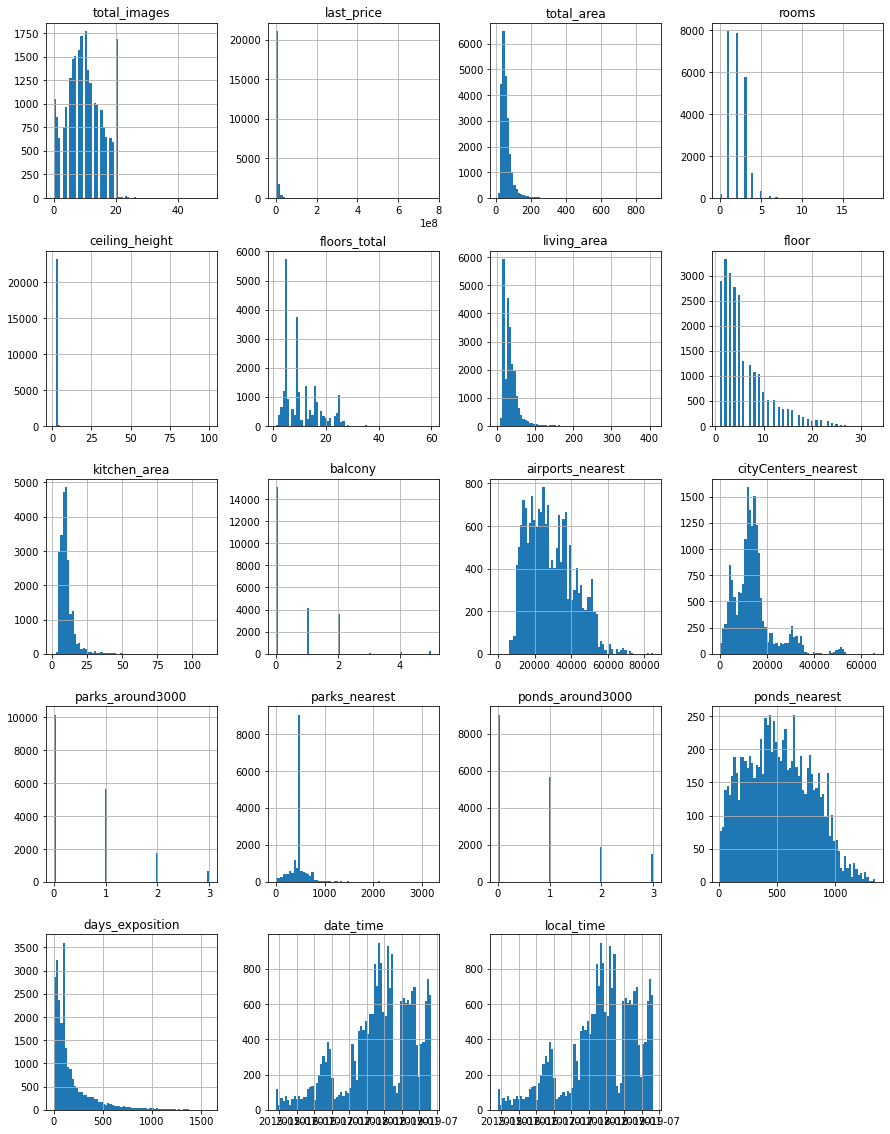

In [122]:
data.hist(bins=70, figsize=(15, 20)); # ';' ставим, чтобы убрать странные комментарии про массив

#### 1) _'ceiling_height'_ anomalitiies

In [123]:
print('Количество пропусков:', data['ceiling_height'].isna().sum())
data['ceiling_height'].describe()
# we can see that the maximum value = 100 which cannot be true

Количество пропусков: 0


count    23467.000000
mean         2.734251
std          1.014264
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [124]:
print(data.query('ceiling_height > 10')['ceiling_height'])

313       13.85
355       25.00
2158      27.00
3148      32.00
4643      25.00
4876      27.00
5076      24.00
5246      27.00
5669      26.00
5807      27.00
6246      25.00
9379      25.00
10067     13.85
10069     13.85
10773     27.00
11285     25.00
14382     25.00
15061     14.00
17496     20.00
17857     27.00
18545     25.00
20478     27.00
20507     22.60
21377     27.50
21824     27.00
22309     10.30
22336     32.00
22869    100.00
22938     27.00
Name: ceiling_height, dtype: float64


From the output above we can conclude that ceiling height contain some abnormal values, which should be better deleted.

In [125]:
data = data.drop(data[data['ceiling_height'] == 100].index)
print(data['ceiling_height'])

0        2.70
1        2.63
2        2.70
3        2.70
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.70
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23466, dtype: float64


**We can see that ceiling height = 100 m removed. For values from 20 to 40 we can assume that it was a sleeping-hand error while manully inserting the data. This issue with _'ceiling height'_ values can be easily fixed by dividing the existing values to 10.**

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_time,local_time


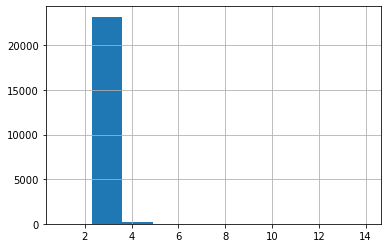

In [126]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

# def change_data(value):
#     if value > 20:
#         return value / 10
#     return value

# data['ceiling_height'] = data['ceiling_height'].apply(change_data)

data['ceiling_height'].hist(); # checking if ceiling_height > 20 is gone

a = data['ceiling_height'] > 20 # checking if ceiling_height > 20 is gone
data[a]

Let's deal with the rest anomalies in the _'ceiling_height'_.

In [127]:
print(data.query('ceiling_height > 5 and ceiling_height < 10')['ceiling_height'])

464      5.2
1026     5.3
1388     5.6
3474     8.0
5863     8.3
7578     5.5
12628    5.3
15743    8.0
17442    8.0
20264    6.0
21227    5.8
Name: ceiling_height, dtype: float64


In [128]:
data = data.drop(data[(data['ceiling_height'] >= 5) & (data['ceiling_height'] <= 10)].index)

In [129]:
print(data.query('ceiling_height < 2')['ceiling_height'])

5712     1.20
16934    1.75
22590    1.00
Name: ceiling_height, dtype: float64


In [130]:
data = data.drop(data[data['ceiling_height'] < 2].index)
print(data['ceiling_height'])

0        2.70
1        2.63
2        2.70
3        2.70
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.70
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23451, dtype: float64


In [131]:
print(data.query('ceiling_height >= 10 and ceiling_height <=20 ')['ceiling_height'])

313      13.85
10067    13.85
10069    13.85
15061    14.00
22309    10.30
Name: ceiling_height, dtype: float64


In [132]:
data = data.drop(data[(data['ceiling_height'] >= 10)].index)
print(data['ceiling_height'])

0        2.70
1        2.63
2        2.70
3        2.70
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.70
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23446, dtype: float64


In [133]:
data['ceiling_height'].describe()

count    23446.000000
mean         2.703104
std          0.220565
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

In [134]:
# проставим индексы заново
data.reset_index(inplace=True, drop=True)
display(data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,location,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_time,local_time
23441,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,False,...,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,95.0,2017-03-21,2017-03-21 03:00:00
23442,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.5,5.0,38.0,4,False,...,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018-01-15,2018-01-15 03:00:00
23443,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.7,3.0,29.7,1,False,...,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,99.0,2018-02-11,2018-02-11 03:00:00
23444,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,31.3,12,False,...,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,2017-03-28,2017-03-28 03:00:00
23445,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,False,...,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,127.0,2017-07-21,2017-07-21 03:00:00


In [135]:
# еще раз проверим, что нет дубликатов в столбце
data['ceiling_height'].isna().sum() # let's check if there are NaN among 'ceiling_height' values

0

In [136]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('location')['ceiling_height'].transform('median'))
data['ceiling_height'].isna().sum()

0

**Ceiling height is now from 2 till 5 m, which looks adequate for regualar apartment in St. Petersburg.**

#### 2) _'total_images'_ anomalitiies

In [137]:
data['total_images'].describe()

count    23446.000000
mean         9.877037
std          5.680047
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

From the _'describe'_ output we can see that max value is really far from the median and mean. On the other hand, 20 images per apartment anouncement can be also the case.

From the above and below output we can see that the mean and the median are fairly close, meaning there might a tail in the distribution, but there outliers does not affect the median anyway.

count    23446.000000
mean         9.877037
std          5.680047
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


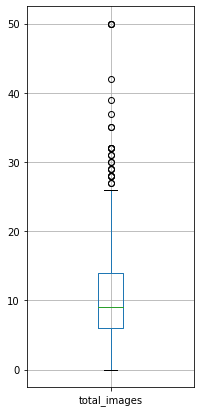

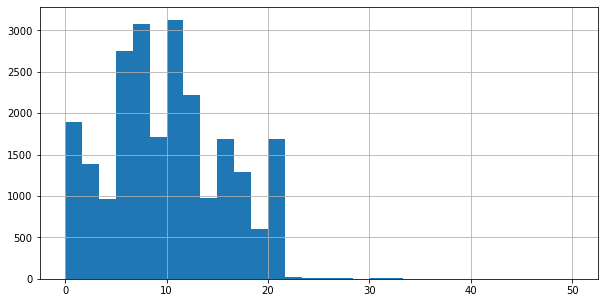

In [138]:
import matplotlib.pyplot as plt
# descriptive statistics
print(data['total_images'].describe())
data.boxplot(column='total_images', figsize=(3,7));
plt.show()
data['total_images'].hist(bins=30, range=(0, 50), figsize=(10, 5));

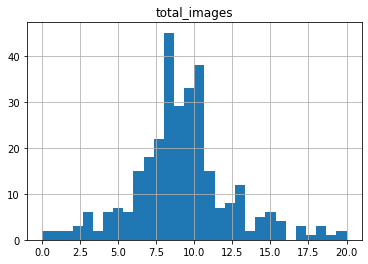

In [139]:
data['total_images_ok'] = data['total_images'] < 20
total_images_ok = data.pivot_table(index='location', values='total_images')

total_images_ok.hist(bins=30); # 'total_images_ok' will be used for further analysis, number of images per ad is up to 20

#### 3) _'last_price'_ anomalitiies check

In [140]:
data['last_price'].describe()

count    2.344600e+04
mean     6.540222e+06
std      1.085224e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

We can see that median is lower than mean, which means there is a long tain in the distribution.

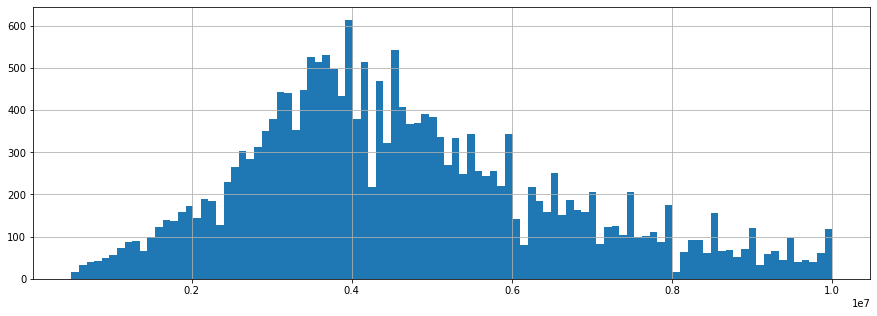

In [141]:
data['last_price'].hist(bins=100, range=(500000, 10000000), figsize=(15, 5));

In [142]:
data.sort_values(by='last_price', ascending=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,date_time,local_time,total_images_ok
8705,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,False,...,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,2019-03-20,2019-03-20 03:00:00,True
17268,7,430000.0,30.4,2019-04-22T00:00:00,1,2.50,2.0,16.0,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,86.0,2019-04-22,2019-04-22 03:00:00,True
14748,5,430000.0,54.0,2018-06-26T00:00:00,2,2.70,3.0,30.0,3,False,...,NaN,NaN,NaN,NaN,NaN,NaN,44.0,2018-06-26,2018-06-26 03:00:00,True
16099,18,440000.0,40.0,2018-07-10T00:00:00,1,2.70,5.0,30.3,1,False,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,2018-07-10,2018-07-10 03:00:00,True
17486,0,450000.0,36.5,2018-02-01T00:00:00,1,2.70,5.0,17.3,4,False,...,NaN,NaN,NaN,NaN,NaN,NaN,120.0,2018-02-01,2018-02-01 03:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15485,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,False,...,32440.0,5297.0,0.0,460.0,2.0,198.0,111.0,2017-12-18,2017-12-18 03:00:00,False
1419,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,False,...,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,2018-04-04,2018-04-04 03:00:00,True
14545,15,401300000.0,401.0,2016-02-20T00:00:00,5,2.70,9.0,204.0,9,False,...,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,2016-02-20,2016-02-20 03:00:00,True
19334,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,False,...,30706.0,7877.0,0.0,460.0,2.0,318.0,106.0,2017-12-06,2017-12-06 03:00:00,True


The price = 12900 does not look adequate.

In [143]:
data = data.drop(data[data['last_price'] == 12900].index)
print(data[data['last_price'] == 12900])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, location, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition, date_time, local_time, total_images_ok]
Index: []

[0 rows x 25 columns]


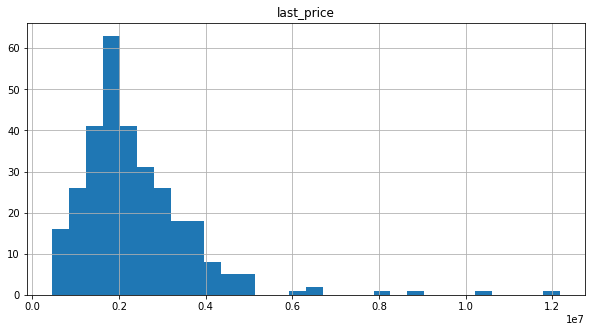

In [144]:
data['last_price_ok'] = data[data['last_price'] < 20000000]['last_price']
last_price_ok = data.pivot_table(index='location', values='last_price')

last_price_ok.hist(bins=30, figsize=(10, 5)); # 'last_price_ok' will be used for further analysis, number of images per ad is up to 20

#### 4) _'total_area'_ anomalities check

count    23446.000000
mean        60.326134
std         35.557163
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64


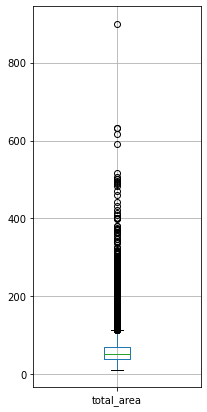

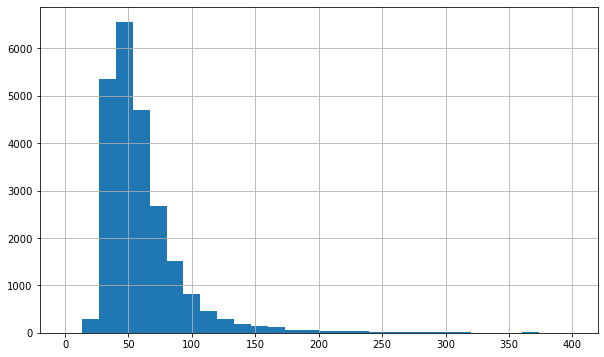

In [145]:
# descriptive statistics
print(data['total_area'].describe())
data.boxplot(column='total_area', figsize=(3,7));
plt.show()
data['total_area'].hist(bins=30, range=(0, 400), figsize=(10, 6)); 

In [146]:
print(data.query('total_area > 200 and total_area < 300 and last_price > 20000000')[['total_area', 'last_price', 'location']])

# data.groupby('locality_name')['living_area']

       total_area  last_price         location
485         216.0  95000000.0  Санкт-Петербург
502         225.0  90000000.0  Санкт-Петербург
514         230.1  25717300.0           Пушкин
672         249.0  24900000.0  Санкт-Петербург
1174        201.0  25000000.0  Санкт-Петербург
...           ...         ...              ...
22758       297.5  30750000.0  Санкт-Петербург
23031       231.2  24800000.0  Санкт-Петербург
23077       215.0  34400000.0  Санкт-Петербург
23150       213.0  30000000.0  Санкт-Петербург
23241       250.0  21800000.0  Санкт-Петербург

[123 rows x 3 columns]


**Minimum square of the apartment is 12 sq. m, this looks quite adequate. Let's consider for this research project apartments up to 300 sq. m and up to 20 mln RUB as a benchmark for apartment in St. Petersburg.**

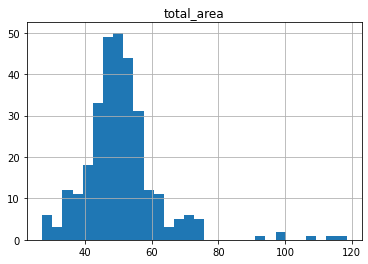

In [147]:
data['total_area_ok'] = data[data['total_area'] <= 300]['total_area']
total_area_ok = data.pivot_table(index='location', values='total_area')

total_area_ok.hist(bins=30); # 'total_are_ok' will be used for further analysis, number of images per ad is up to 20

#### 5) _'rooms'_ anomalities check

In [148]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

count    23446.000000
mean         2.071057
std          1.078446
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


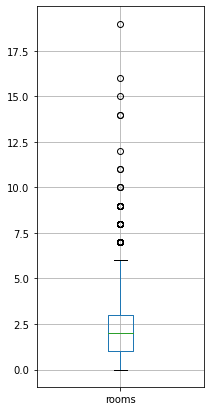

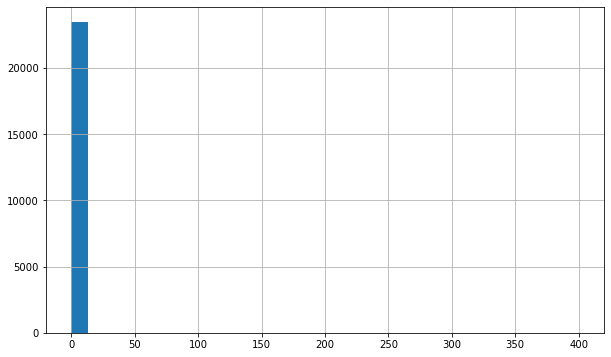

In [149]:
# descriptive statistics
print(data['rooms'].describe())
data.boxplot(column='rooms', figsize=(3,7));
plt.show()
data['rooms'].hist(bins=30, range=(0, 400), figsize=(10, 6));

From the unique values for number of rooms we can see that some 0 rooms is an abnormal value - let's remove it.

In [150]:
data = data.drop(data[(data['rooms'] <= 0)].index)
print(data['rooms'].unique())

[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]


#### 6) _'floors_total'_ anomalities check

In [151]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52.])

count    23256.000000
mean        10.632654
std          6.559556
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


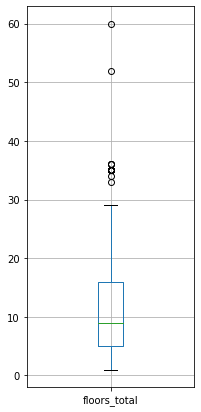

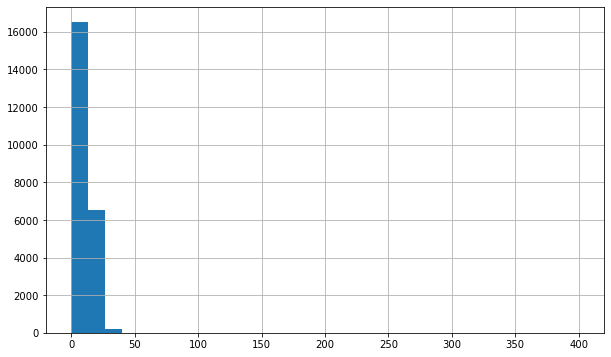

In [152]:
# descriptive statistics
print(data['floors_total'].describe())
data.boxplot(column='floors_total', figsize=(3,7));
plt.show()
data['floors_total'].hist(bins=30, range=(0, 400), figsize=(10, 6));

In [153]:
data['floors_total'].isna().sum()

0

The highest residential building in St. Petersburg is 37 floors. So, values above are abnormal. We remove them from the data set.

In [154]:
data = data.drop(data[data['floors_total'] > 39].index)
print(data['floors_total'].unique())

[16. 11.  5. 14. 12. 26. 24. 27.  9.  6. 17. 25.  3. 23. 19. 18.  4. 22.
  8.  2. 10.  7. 13. 15. 20. 28. 36. 21. 35. 34.  1. 29. 33.]


As for 86 missing values, we fill them in me median based on location.

In [155]:
data['floors_total'] = data['floors_total'].fillna(data.groupby('location')['floors_total'].transform('median'))
data['floors_total'].isna().sum()

0

#### 7) _'living_area'_ anomalities check

Since we assumed above that the total area of the apartment is less than 300 sq. m, we thus have to drop living area also up to (300 sq. m - 10%) = 270 sq. m at least.

count    23254.000000
mean        34.199848
std         21.260747
min          2.000000
25%         19.000000
50%         30.500000
75%         41.400000
max        409.700000
Name: living_area, dtype: float64


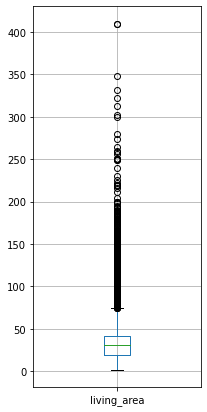

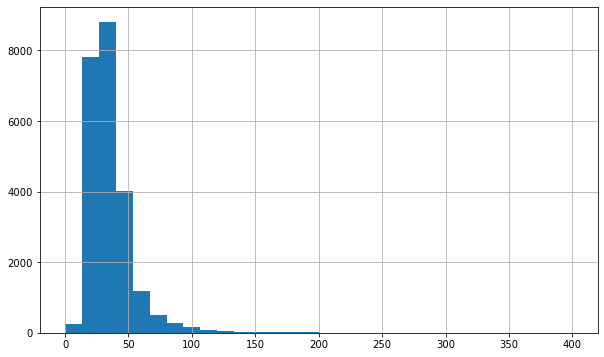

In [156]:
# descriptive statistics
print(data['living_area'].describe())
data.boxplot(column='living_area', figsize=(3,7));
plt.show()
data['living_area'].hist(bins=30, range=(0, 400), figsize=(10, 6));

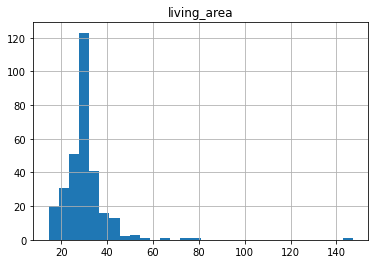

In [157]:
data['living_area_ok'] = data['living_area'] <= 270
living_area_ok = data.pivot_table(index='location', values='living_area')

living_area_ok.hist(bins=30); # 'total_are_ok' will be used for further analysis, number of images per ad is up to 20

#### 8) _'floor'_ anomalities check

In [158]:
data['floor'].unique() # looks ok for further analysis

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

#### 9) _'kitchen_area'_ anomalities check

count    23254.000000
mean        10.468112
std          5.656020
min          1.300000
25%          7.200000
50%          9.500000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64


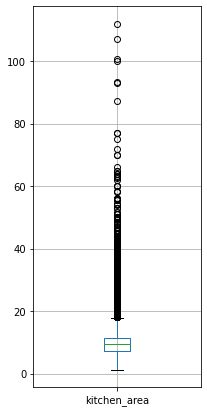

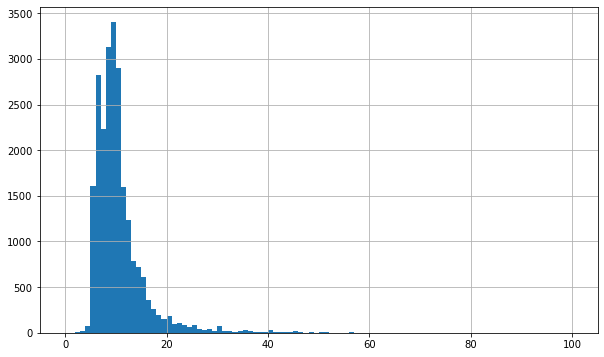

In [159]:
# descriptive statistics
print(data['kitchen_area'].describe())
data.boxplot(column='kitchen_area', figsize=(3,7));
plt.show()

data['kitchen_area'].hist(bins=100, range=(0, 100), figsize=(10, 6)); 

_Keeping in mind that the smallest apartment is 12 sq. m, the kitchen 1.3 sq. m can be the case. The largest kitchen 107 sq. m looks also OK since the largest apartment assumed is 300 sq. m, and the kitchen in this case is 30% of the total area, which looks reasonable._

#### 10) _'days_exposition'_ anomalities check

count    23254.000000
mean       170.665326
std        207.460846
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64


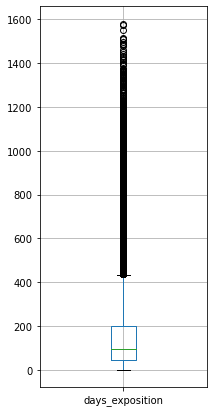

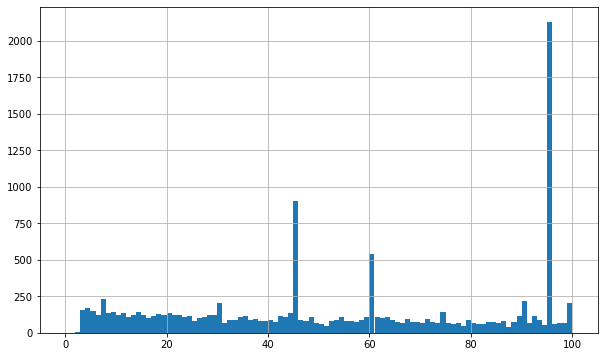

In [160]:
# descriptive statistics
print(data['days_exposition'].describe())
data.boxplot(column='days_exposition', figsize=(3,7));
plt.show()

data['days_exposition'].hist(bins=100, range=(0, 100), figsize=(10, 6)); 

The range of advertisement length is from 1 day till 1580 days (around 7 years). Obviously, the data contain some anomalies. For this particular research let's keep the advertisemnt's length from 10 days till 366 days. This errors might happen for the following reasons:
- people changed their mind and do not want to sell their apartment, so they deleted the advertisement in several days;
- people (owners) have already sold the apartment and forgotten to delete the ad from the website;
- people (owners) have chosen another website for selling and deleted the ad.

In [161]:
data = data.drop(data[(data['days_exposition'] < 10) | (data['days_exposition'] > 366)].index)
print(data['days_exposition'])

# days_exposition_ok = data.pivot_table(index='location', values='days_exposition_ok', aggfunc='median')

#  days_exposition_ok.hist(bins=30, figsize=(10, 5));
# print(data)

0         95.0
1         81.0
4        121.0
5         55.0
6        155.0
         ...  
23440    239.0
23441     95.0
23442     45.0
23443     99.0
23445    127.0
Name: days_exposition, Length: 19123, dtype: float64


**11) _'cityCenters_nearest'_ Distance to the city center anomalies**

In [162]:
data['cityCenters_nearest']

0        16028.0
1        18603.0
4         8098.0
5            NaN
6        19143.0
          ...   
23440    34104.0
23441     4232.0
23442        NaN
23443        NaN
23445        NaN
Name: cityCenters_nearest, Length: 19123, dtype: float64

count    14785.000000
mean     14400.342171
std       8578.123068
min        181.000000
25%       9626.000000
50%      13222.000000
75%      16385.000000
max      64857.000000
Name: cityCenters_nearest, dtype: float64


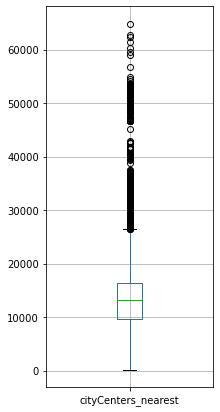

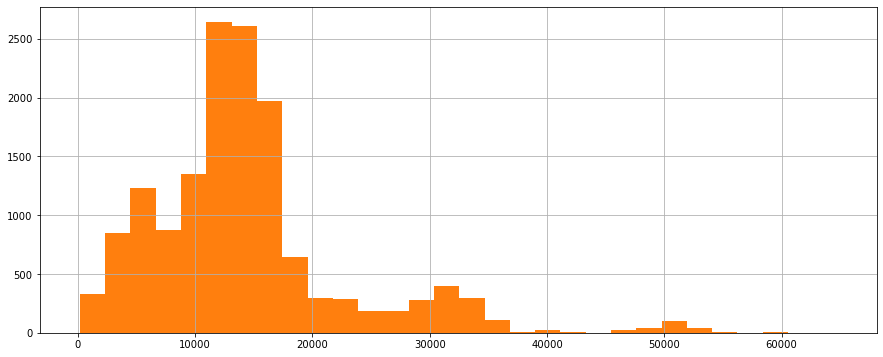

In [163]:
# descriptive statistics
print(data['cityCenters_nearest'].describe())
data.boxplot(column='cityCenters_nearest', figsize=(3,7));
plt.show()

data['cityCenters_nearest'].hist(bins=100, range=(0, 100), figsize=(10, 6)); 
data['cityCenters_nearest'].hist(bins=30, figsize=(15, 6));

Distance to the city center distribution has a long tail, a right-handed skewness (positive skewness).

**12) _'parks_nearest'_ не может быть меньше нуля; также сложно представить себе квартиру, которая находится менее 50 м от парка.**

In [164]:
data = data.drop(data[(data['parks_nearest'] <= 50)].index)
data['parks_nearest']

0        482.0
1          NaN
4        112.0
5          NaN
6        733.0
         ...  
23440    352.0
23441    796.0
23442      NaN
23443      NaN
23445      NaN
Name: parks_nearest, Length: 18976, dtype: float64

count    14124.000000
mean       480.314217
std        228.723351
min         51.000000
25%        434.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


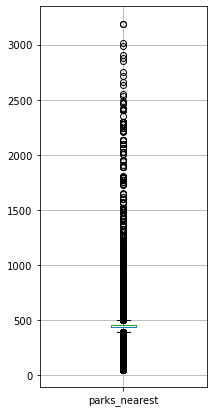

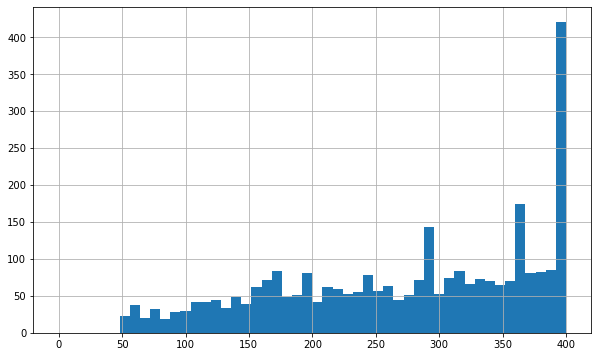

In [165]:
# проверим, насколько данные стали выглядеть лучше
# descriptive statistics
print(data['parks_nearest'].describe())
data.boxplot(column='parks_nearest', figsize=(3,7));
plt.show()

data['parks_nearest'].hist(bins=50, range=(0, 400), figsize=(10, 6)); 

In [166]:
data['parks_nearest'].isna().sum() / len(data)

0.25569139966273186

### 2.5 Data manipulation

Let's add useful columns in the dataframe:
- price for 1 sq. m;
- day of the week of ad publishing (0 — Monday, 1 — Tuesday, 2 - Wednesday, 3 - Thursday, 4 - Friday, 5 - Saturday, 6 - Sunday);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [167]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'location', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'date_time', 'local_time',
       'total_images_ok', 'last_price_ok', 'total_area_ok', 'living_area_ok'],
      dtype='object')

- **_price_ for 1 sq. m;**

In [168]:
data['price_per_square'] = (data['last_price'] / data['total_area']).round(0).astype(int)
data['price_per_square']

0        120370
1         82921
4        100000
5         95066
6         99196
          ...  
23440     73718
23441     72491
23442     52542
23443     44092
23445     41796
Name: price_per_square, Length: 18976, dtype: int64

- **_day of the week_ when the ad was published** (0 — Monday, 2 — Tuesday, 3 - Wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday, 7 - Sunday);

In [169]:
data['day'] = data['date_time'].dt.dayofweek
data['day']

0        3
1        1
4        1
5        0
6        3
        ..
23440    4
23441    1
23442    0
23443    6
23445    4
Name: day, Length: 18976, dtype: int64

- **_month_ when the ad was published (месяц публикации объявления);**

In [170]:
data['date_month'] = data['date_time'].dt.month
data['date_month']

0         3
1        12
4         6
5         9
6        11
         ..
23440     8
23441     3
23442     1
23443     2
23445     7
Name: date_month, Length: 18976, dtype: int64

- **_year_ when the ad was published (год публикации объявления);**

In [171]:
data['date_year'] = data['date_time'].dt.year
data['date_year']

0        2019
1        2018
4        2018
5        2018
6        2017
         ... 
23440    2016
23441    2017
23442    2018
23443    2018
23445    2017
Name: date_year, Length: 18976, dtype: int64

It might happen that the same month can occur in different year. This thus will lead to the error bias. That's why it is important to use the following option to change the date format _dt.to_period('M')_. Let's create 

In [220]:
data['month_year'] = data['date_time'].dt.to_period('M')
# M - месяц
# D - день
data['month_year']

0        2019-03
1        2018-12
4        2018-06
5        2018-09
6        2017-11
          ...   
23440    2016-08
23441    2017-03
23442    2018-01
23443    2018-02
23445    2017-07
Name: month_year, Length: 18951, dtype: period[M]

In [172]:
data['local_time'].head(100)

0     2019-03-07 03:00:00
1     2018-12-04 03:00:00
4     2018-06-19 03:00:00
5     2018-09-10 03:00:00
6     2017-11-02 03:00:00
              ...        
123   2019-03-10 03:00:00
124   2018-02-25 03:00:00
126   2019-04-29 03:00:00
127   2019-02-13 03:00:00
128   2018-02-01 03:00:00
Name: local_time, Length: 100, dtype: datetime64[ns]

- **_floor type - "first", "top", "other"_ (тип этажа квартиры (значения — «первый», «последний», «другой»));**

In [173]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'


data['floor_type'] = data.apply(floor_type, axis=1)

print(data['floor_type'].unique()) # check how the floor_type() function works

['другой' 'первый' 'последний']


- **_rooms_ classification**

In [174]:
def apartment_type(square):
    if square['total_area'] < 40:
        return 'менее 40 кв. м'
    if (square['total_area'] >=40 and square['total_area'] < 60):
        return '40-60 кв. м'
    if (square['total_area'] >=60 and square['total_area'] < 100):
        return '40-60 кв. м'
    if square['total_area'] >=100:
        return 'более 100 кв. м'

data['apartment_type'] = data.apply(apartment_type, axis=1)

print(data['apartment_type'].unique()) # check how the floor_type() function works

['более 100 кв. м' '40-60 кв. м' 'менее 40 кв. м']


- **_distance to the city centre_ (расстояние до центра города, м);**

The variable _'cityCenters_nearest'_ is in metres. Let's divide it into 1000 to get in kilometres.

In [175]:
data['city_center_km'] = data['cityCenters_nearest'] / 1000
data['city_center_km'] = data['city_center_km'].round(0)
data['city_center_km'] = data['city_center_km'].astype('int', errors='ignore')
data['city_center_km']

0        16.0
1        19.0
4         8.0
5         NaN
6        19.0
         ... 
23440    34.0
23441     4.0
23442     NaN
23443     NaN
23445     NaN
Name: city_center_km, Length: 18976, dtype: float64

count    14638.000000
mean        14.371909
std          8.545820
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         65.000000
Name: city_center_km, dtype: float64


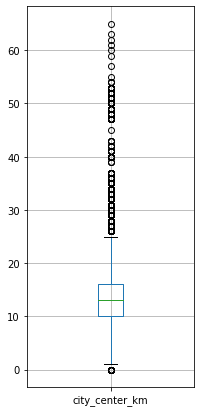

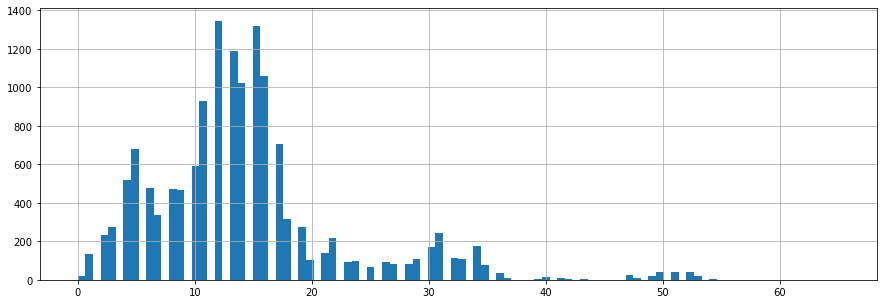

In [176]:
# descriptive statistics
print(data['city_center_km'].describe())
data.boxplot(column='city_center_km', figsize=(3,7));
plt.show()
data['city_center_km'].hist(bins=100, figsize=(15, 5));

- **_airports_nearest_ расстояние до ближайшего аэропорта**

In [177]:
data['airport_dist_km'] = data['airports_nearest'] / 1000
data['airport_dist_km'] = data['airport_dist_km'].round(0)
data['airport_dist_km'] = data['airport_dist_km'].astype('int', errors='ignore')
data['airport_dist_km']

0        19.0
1        13.0
4        32.0
5         NaN
6        53.0
         ... 
23440    46.0
23441    25.0
23442     NaN
23443     NaN
23445     NaN
Name: airport_dist_km, Length: 18976, dtype: float64

count    14638.000000
mean        29.017967
std         12.730767
min          0.000000
25%         19.000000
50%         27.000000
75%         37.000000
max         84.000000
Name: airport_dist_km, dtype: float64


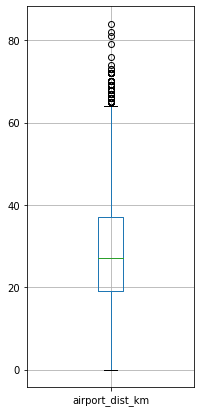

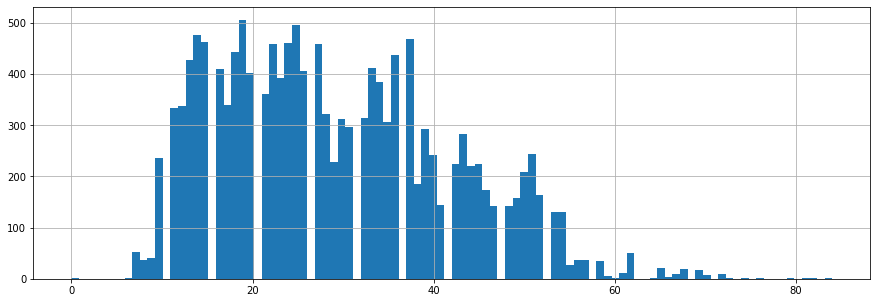

In [178]:
# descriptive statistics
print(data['airport_dist_km'].describe())
data.boxplot(column='airport_dist_km', figsize=(3,7));
plt.show()
data['airport_dist_km'].hist(bins=100, figsize=(15, 5));

count    14124.000000
mean       480.314217
std        228.723351
min         51.000000
25%        434.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


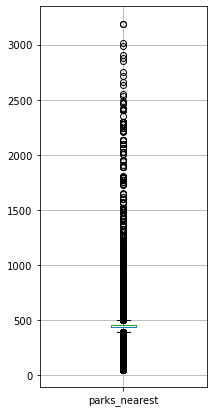

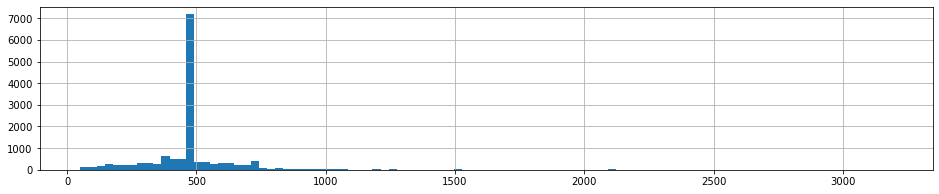

In [179]:
# descriptive statistics
print(data['parks_nearest'].describe())
data.boxplot(column='parks_nearest', figsize=(3,7));
plt.show()
data['parks_nearest'].hist(figsize=(16,3), bins=100);

In [180]:
# writing to csv
data_cleared = data.to_csv('/Users/yuliabezginova/PycharmProjects/project-2_real_estate_SPb/real_estate_data_cleared.csv')

## 3. Research Data Analysis

### 3.1 Data Description

Let's describe the variables as follows:
- measures of **central tendency**:
    - mean;
    - median;
    - mode;
- measures of **variability**:
    - distribution shape;
    - range;
    - standard deviation;
    - variance.

Проанализируем и опишем основные переменные, которые будут использоваться в дальнейшем анализе.

### **_total_area_** (общая площадь)

count    18976.000000
mean        59.824625
std         34.517313
min         12.000000
25%         40.000000
50%         52.000000
75%         68.900000
max        900.000000
Name: total_area, dtype: float64


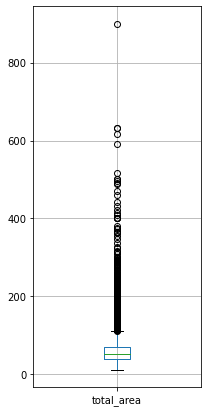

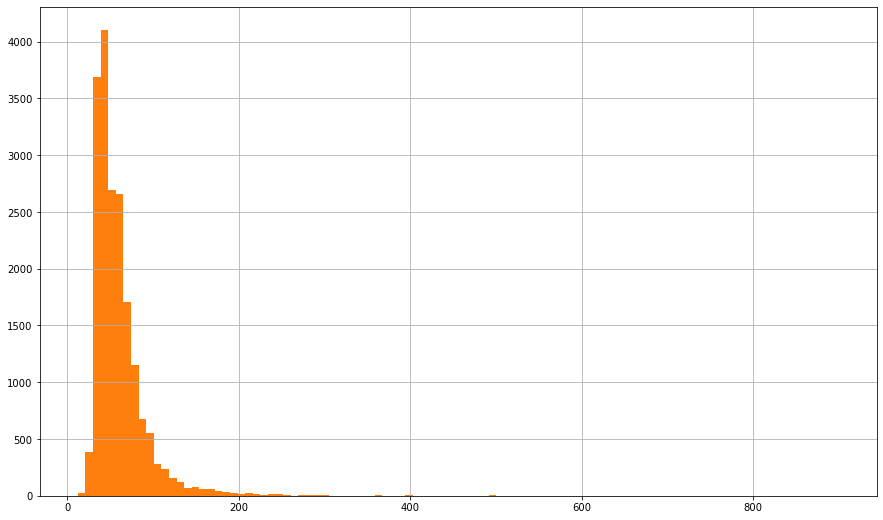

In [181]:
print(data['total_area'].describe())
      
data.boxplot(column='total_area', figsize=(3,7))
plt.show()
data['total_area'].hist(figsize=(16,3), bins=100)

data['total_area'].hist(bins=100, figsize=(15, 9));

**Медиана и среднее почти одинаковы, а значит, данные подготовлены хорошо, выборосов нет.**

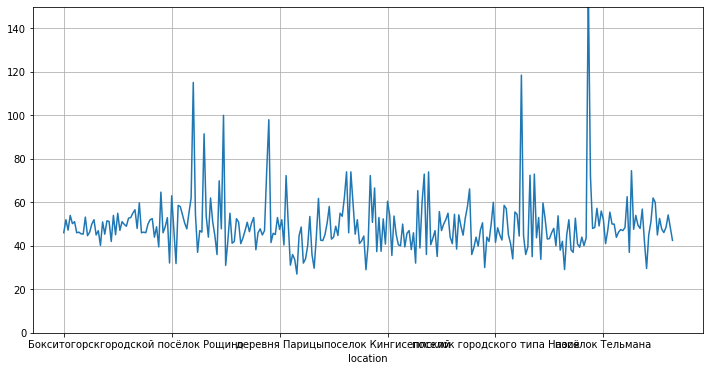

In [182]:
total_area = data.groupby('location')['total_area'].median().plot(y='location', x='total_area', ylim=(0, 150), grid=True, figsize=(12, 6));

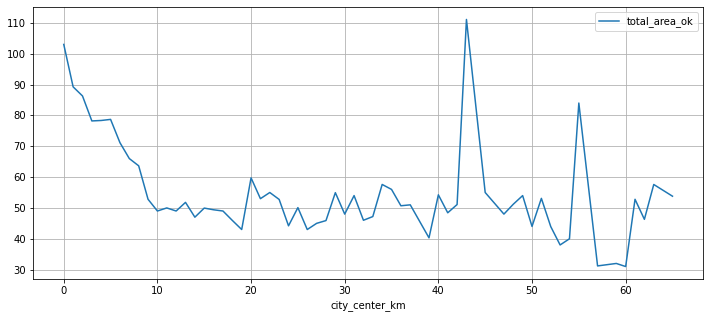

In [183]:
(
    data.query('total_area > 8 and total_area < 300')
    .pivot_table(index='city_center_km', values='total_area_ok', aggfunc='median')
    .plot(grid=True, figsize=(12, 5))
);

**Расстояние до центра города должно увеличивать цену квартиры. На графике, в целом, так и есть. Однако есть редкие значения, где удаленность от центра города не влияет на цену.**

count    18976.000000
mean        59.824625
std         34.517313
min         12.000000
25%         40.000000
50%         52.000000
75%         68.900000
max        900.000000
Name: total_area, dtype: float64


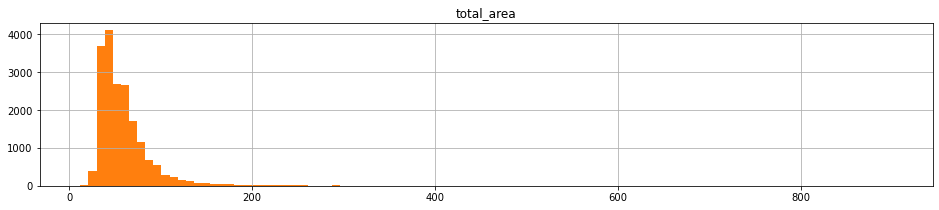

In [184]:
(
    data.query('total_area > 8 and total_area < 300')
    .pivot_table(index='location', values='total_area', aggfunc='median')
    .hist(bins=100, figsize=(20, 6))
);

print(data['total_area'].describe())
data['total_area'].hist(figsize=(16,3), bins=100);

**Выводы _total_area_**
- значения общей площади продаваемых квартир ограничены диапазоном от 8 до 300 кв. м.

### **_living_area_** (жилая площадь)

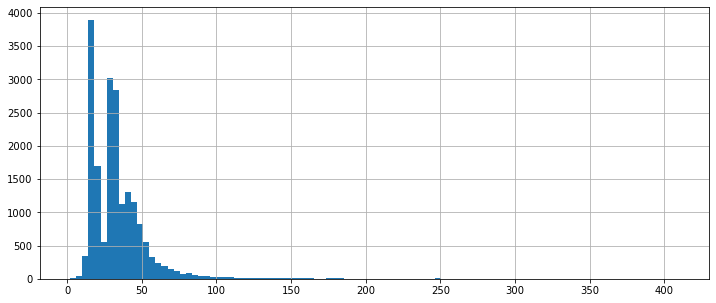

In [185]:
data['living_area'].hist(bins=100, figsize=(12, 5));

Если переменная _'total_area'_ ограничена диапазоном (8; 300), то жилая площадь _'living_area'_ - это площадь за вычетом ванной, коридора, кухни. В среднем, это 10% от общей площади квартиры.

count    18976.000000
mean        33.770388
std         20.545202
min          2.000000
25%         19.000000
50%         30.450000
75%         41.000000
max        409.700000
Name: living_area, dtype: float64


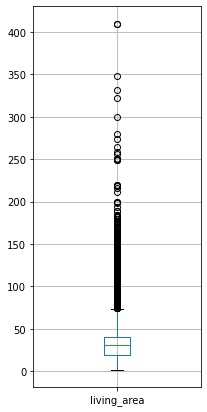

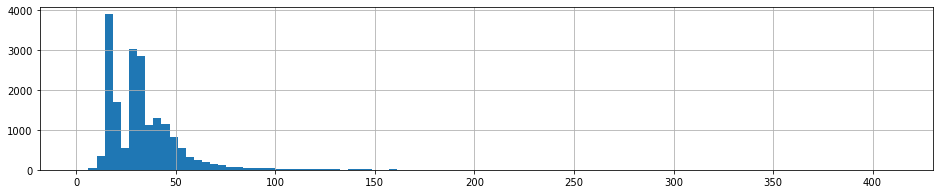

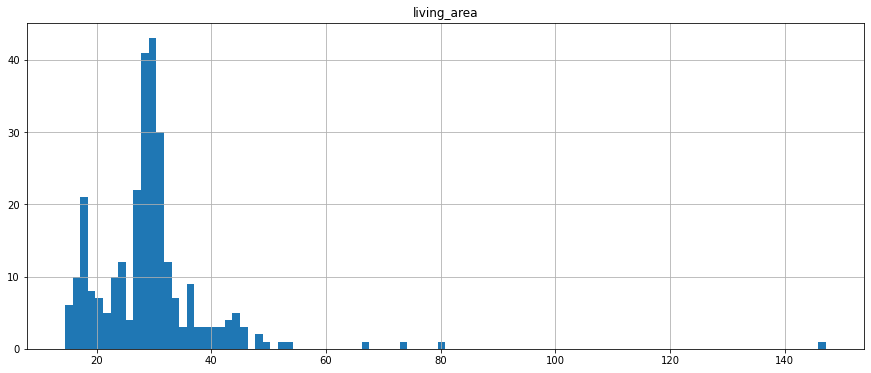

In [186]:
print(data['living_area'].describe())
      
data.boxplot(column='living_area', figsize=(3,7))
plt.show()
data['living_area'].hist(figsize=(16,3), bins=100)

(
    data.query('living_area > 5 and total_area < 270')
    .pivot_table(index='location', values='living_area', aggfunc='median')
    .hist(bins=100, figsize=(15, 6))
);

**Выводы _living_area_:**
- жилая площадь ограничена диапазоном от 5 до 270 кв. м
- данные подготовлены хорошо, выбросов нет.

### **_kitchen_area_** (площадь кухни)

count    18976.000000
mean        10.374611
std          5.513335
min          1.300000
25%          7.100000
50%          9.500000
75%         11.400000
max        112.000000
Name: kitchen_area, dtype: float64


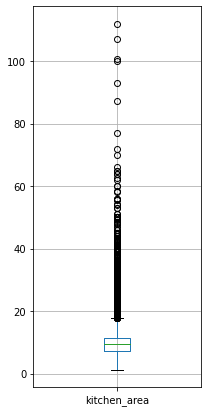

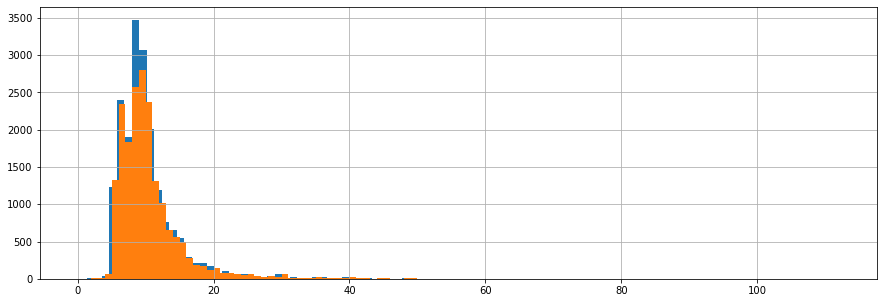

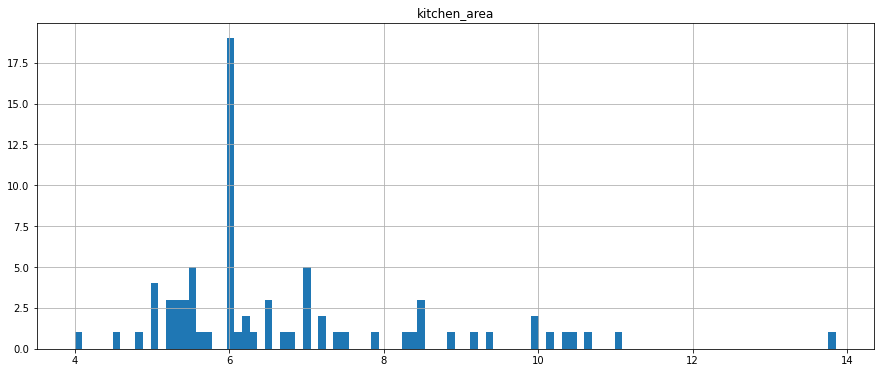

In [187]:
print(data['kitchen_area'].describe())
      
data.boxplot(column='kitchen_area', figsize=(3,7))
plt.show()
data['kitchen_area'].hist(figsize=(16,3), bins=100)

data['kitchen_area'].hist(bins=50, range=(0, 50), figsize=(15, 5));

kitchen = (
    data.query('kitchen_area >= 1 and total_area <= 30')
    .pivot_table(index='location', values='kitchen_area', aggfunc='median')
    .hist(bins=100, figsize=(15, 6))
);

**Выводы _kitchen_area_:**
- распределение положительно смещенное;
- медиана и среднее почти одинаковы, однако стандартное отклонение велико, что говорит об аномальных значениях в данных;
- если ограничить площадь кухни от 1 кв. м до 30 кв. м, что соответствует диапазону выбранной жилой и общей площади, то самая популярная площадь кухни продаваемых квартир - это 6 кв. м, что вполне соответствует значения кухни в "сталинках" и "хрущевках".

### _last_price_ (цена объекта)

count    1.897600e+04
mean     6.421068e+06
std      1.071551e+07
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      7.630000e+08
Name: last_price, dtype: float64


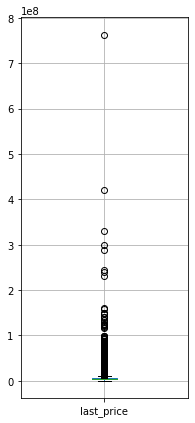

count        18976
mean       6421068
std       10715511
min         430000
25%        3450000
50%        4650000
75%        6700000
max      763000000
Name: last_price, dtype: int64

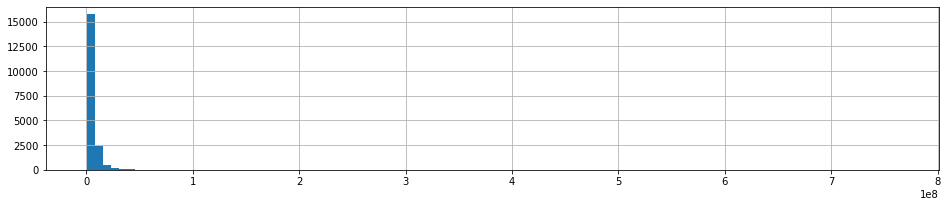

In [188]:

print(data['last_price'].describe())
      
data.boxplot(column='last_price', figsize=(3,7))
plt.show()
data['last_price'].hist(figsize=(16,3), bins=100)

data['last_price'].describe().astype('int')

In [189]:
# df['column'] = df['column'].astype('int')
data['last_price_mln'] = (data['last_price'] / 1000000).astype('int')

In [190]:
data['last_price_mln'].describe()

count    18976.000000
mean         5.933231
std         10.743002
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        763.000000
Name: last_price_mln, dtype: float64

Цена 763 млн рублей, как и 0 рублей - слишком странные. В рамках данного исследования принято решение ограничить цену.

count    18951.000000
mean         5.671310
std          6.180084
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         99.000000
Name: last_price_mln, dtype: float64


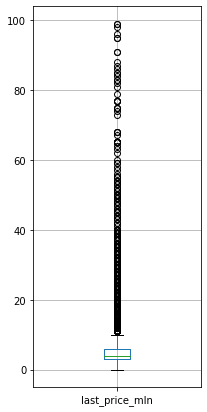

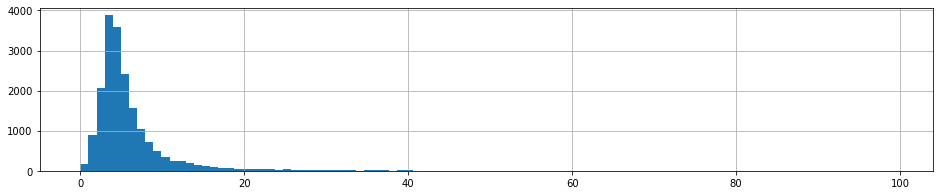

In [191]:
data = data.drop(data[(data['last_price_mln'] > 100) | (data['last_price_mln'] < 0)].index)

print(data['last_price_mln'].describe())
      
data.boxplot(column='last_price_mln', figsize=(3,7));
plt.show()
data['last_price_mln'].hist(figsize=(16,3), bins=100);

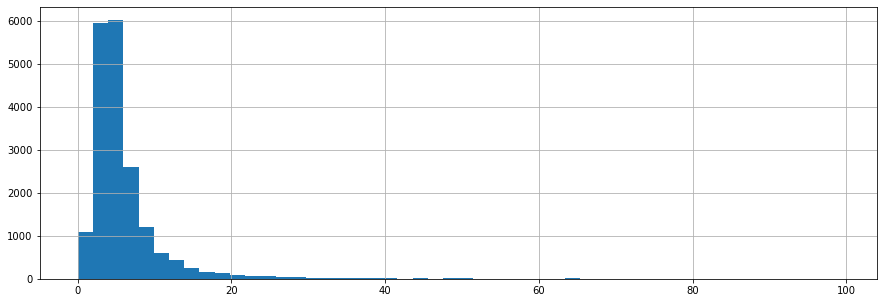

In [192]:
data['last_price_mln'].hist(bins=50, figsize=(15, 5));

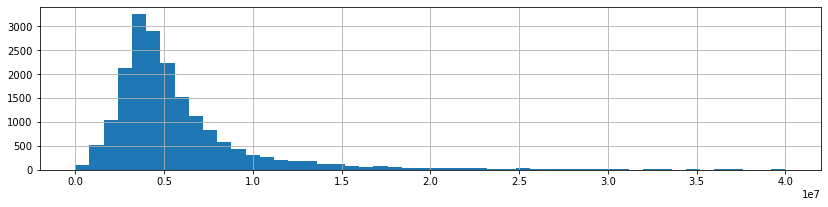

In [193]:
data['last_price'].hist(range=(0,40000000),figsize=(14,3), bins=50);

**Выводы _last_price_mln:**
- распределение положительно смещенное;
- аномальные значения удалены (0, 763);
- среднее и медиана близки по значениям, что говорит о том, что столбец готов для дальнейшего построяения модели.

### _rooms_ (количество комнат)

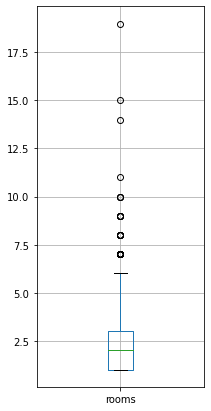

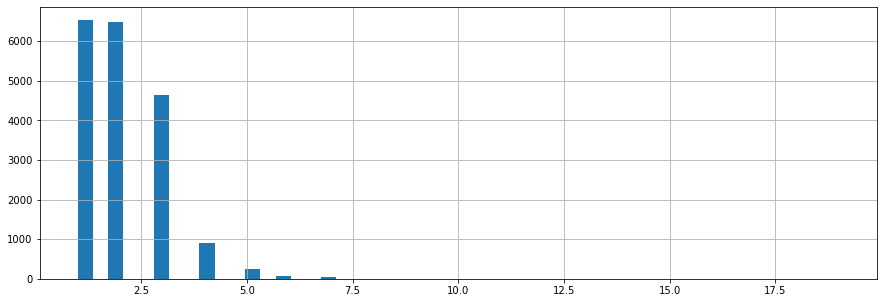

In [194]:
data['rooms'].describe()
      
data.boxplot(column='rooms', figsize=(3,7));
plt.show()
data['rooms'].hist(bins=50, figsize=(15, 5));

**Выводы _rooms_:**
- самые популярные в продаже квартиры - одно- и двухкомнатные.
    

### _ceiling_height_ (высота потолков)

count    18951.000000
mean         2.697155
std          0.213735
min          2.000000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64


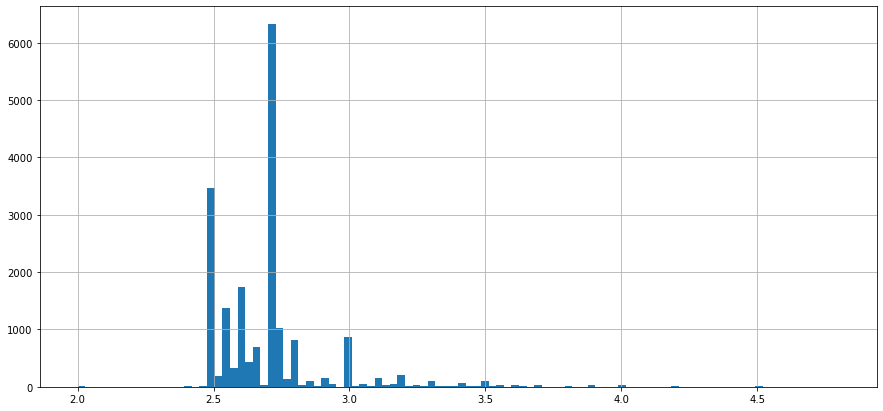

In [195]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=100, figsize=(15, 7));

**Выводы _ceiling_height_:**
- самое популрярное значение высоты потолков - 2.7 м

### _floors_ (этаж квартиры)

count    18951.000000
mean         5.901852
std          4.876823
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64


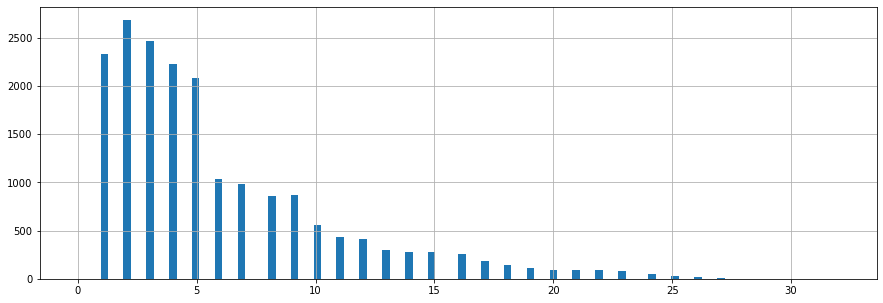

In [196]:
print(data['floor'].describe())
data['floor'].hist(bins=100, figsize=(15, 5), range=(0, 32));

**Выводы _floors_:**
- больше всего квартир в продаже с 1 по 5 этаж;
- чем выше этаж, тем ниже предложение. Это может быть вызвано высоким предложением и спросом на новостройки, в то время как готовое жилье ранее строителось в малоэтажных домах.

### _floor_type_ (типа этажности: _"перый", "последний", "другой"_)

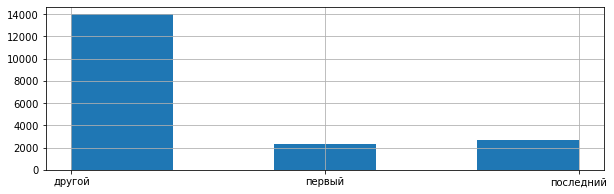

In [197]:
data['floor_type'].describe()
data['floor_type'].hist(bins=5, figsize=(10, 3));

**Выводы _floor_type_:**
- больше всего квартир продается НЕ на первом и НЕ на последнем этажах.

### _city_center_km_ (расстояние до центра города, км)

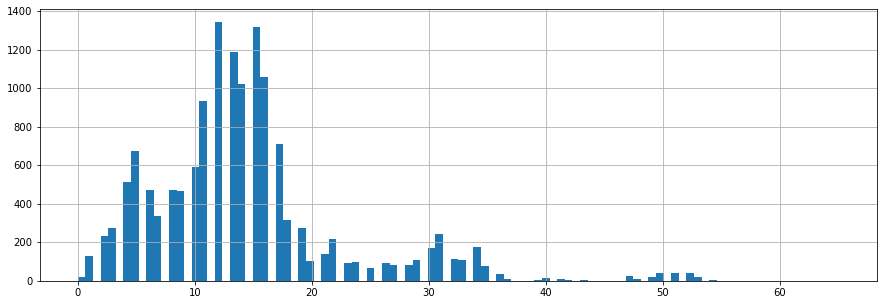

In [198]:
data['city_center_km'].describe()
data['city_center_km'].hist(bins=100, figsize=(15, 5));

**Выводы _city_center_km_:**
- большая часть квартир удалены на от центра на 13 км;
- квартир в центре города продается в 10 раз меньше, чем в средней удаленности от него.

### _airport_dist_km_ (расстояние до ближайшего аэропорта, км)

count    14613.000000
mean        29.021009
std         12.740145
min          0.000000
25%         19.000000
50%         27.000000
75%         37.000000
max         84.000000
Name: airport_dist_km, dtype: float64


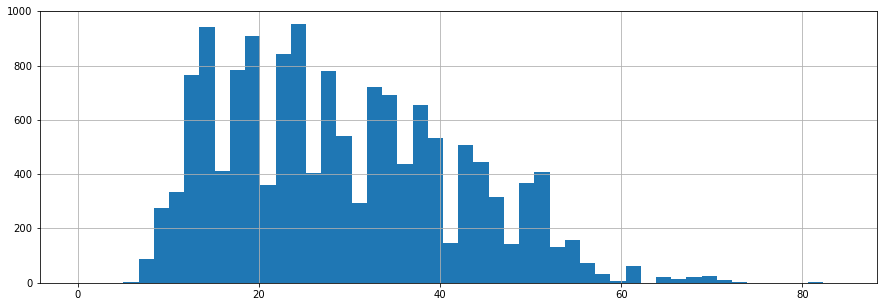

In [199]:
print(data['airport_dist_km'].describe())
data['airport_dist_km'].hist(bins=50, figsize=(15, 5));

**Выводы _airport_dist_km_:**
- медиана и среднее примерно равны, значит, столбец с данными хорошо подготовлен, выбросов нет;
- среднее расстояние до аэропорта около 30 км.

### _parks_nearest_ (расстояние до ближайшего парка, м)

count    14099.000000
mean       480.471381
std        228.806208
min         51.000000
25%        434.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64


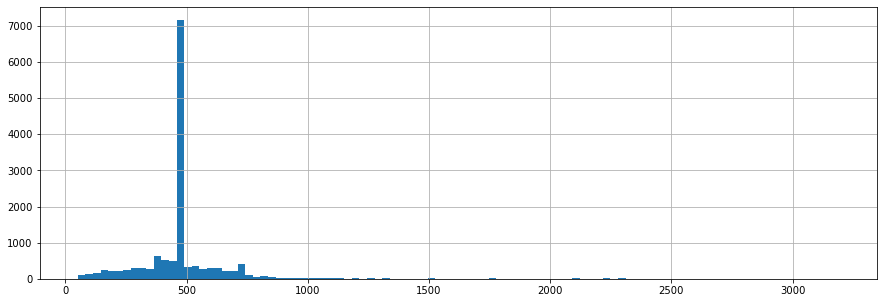

In [200]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=100, figsize=(15, 5));

In [201]:
data['parks_km'] = data['parks_nearest'] / 1000
data['parks_km'].describe()

count    14099.000000
mean         0.480471
std          0.228806
min          0.051000
25%          0.434000
50%          0.460000
75%          0.460000
max          3.190000
Name: parks_km, dtype: float64

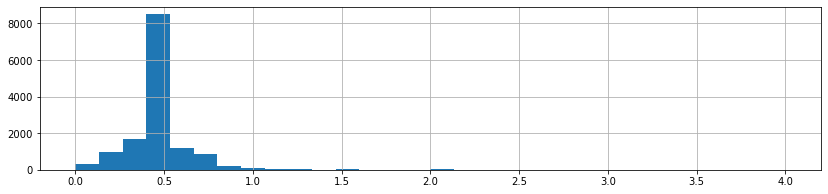

In [202]:
data['parks_km'].hist(bins=30, figsize=(14, 3), range=(0, 4));

**Выводы _parks_km_:** 
- изначально в данных были представлены в метрах, для удобства мы перевели расстояния до парка в километры;
- исключили значения 0, так как квартира не может находится в парке;
- ввели минимальное значение = 50 м, имея в виду, что парк находится максимально рядом с домом;
- максимальное значение = 3.19 км;
- медиана (0.46 км) почти равна среднему (0.48 км), значит данные подготовлены качественно, выбросов нет.

### _day_ , _date_month_ _date_year_ (день, месяц и год публикации объявления)

- 0 - Monday
- 1 - Tuesday
- 2 - Wednesday
- 3 - Thursday
- 4 - Friday
- 5 - Saturday
- 6 - Sunday

count    18951.000000
mean         2.573954
std          1.794305
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64


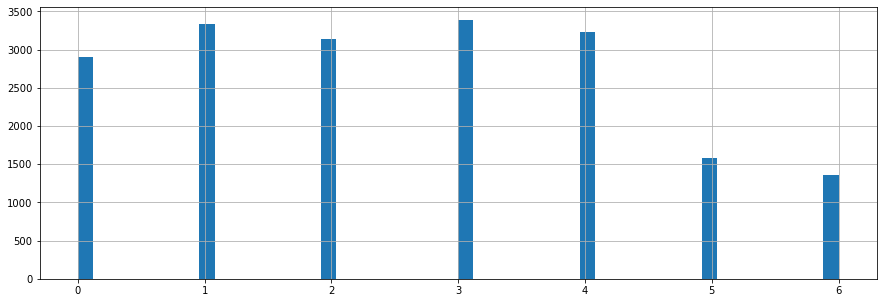

In [203]:
print(data['day'].describe())
data['day'].hist(bins=50, figsize=(15, 5));

**Вывод**: больше всего объявлений о продаже квартир публикуется в понедельник и четверг; меньше всего - в воскресенье.

count    18951.000000
mean         6.361617
std          3.493385
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: date_month, dtype: float64


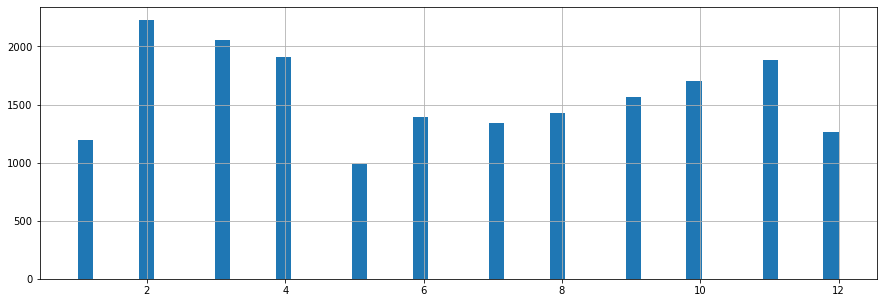

In [204]:
print(data['date_month'].describe())
data['date_month'].hist(bins=50, figsize=(15, 5));

**Вывод:** больше всего объявлений публикуется в феврале, что вполне объяснимо, так как люди после длинных новогодних праздников, когда планы на год написаны начинают их реализовывать в начале года.

count    18951.000000
mean      2017.546884
std          0.898492
min       2014.000000
25%       2017.000000
50%       2018.000000
75%       2018.000000
max       2019.000000
Name: date_year, dtype: float64


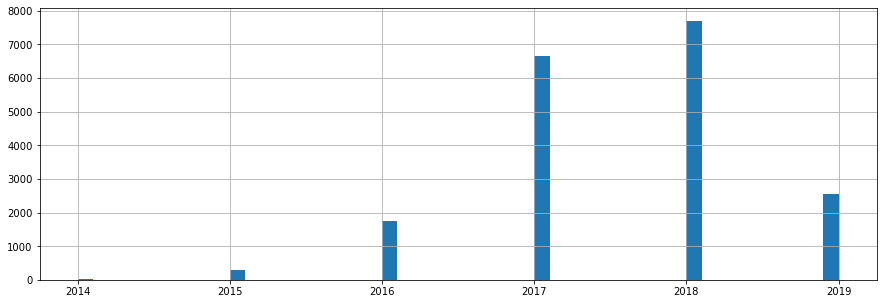

In [205]:
print(data['date_year'].describe())
data['date_year'].hist(bins=50, figsize=(15, 5));

## 3.2 Research questions

### RQ 1 - Как быстро продавались квартиры? How soon was the apartment sold?

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
- В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

Среднее =  109.75718959421667
Мединана =  95.0


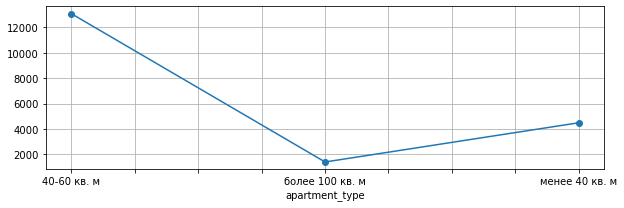

In [206]:
print('Среднее = ', data['days_exposition'].mean())
print('Мединана = ', data['days_exposition'].median())
apartment_type_sold = data.groupby('apartment_type')['days_exposition'].count().plot(style='o-', grid=True, figsize=(10, 3))

- **На графике ниже видим, что больше всего в продаже небольших квартир площадью 40-60 кв. м. Менее всего продается квартир от 100 до 300 кв. м.**
- Среднее и медиана примерно одинаковы, это значит, что данные подготовлены хорошо, выбросов нет.
- В среднем, квартира продается 100 дней или 3 месяца.


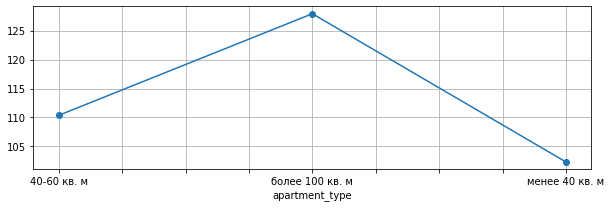

In [207]:
apartment_type_sold = data.groupby('apartment_type')['days_exposition'].mean().plot(style='o-', grid=True, figsize=(10, 3))

**Среднее количество дней, сколько продается квартира 40-60 кв. м - это 110 дней, или чуть более 3-х месяцев, что соответствует реалиям рынка недвижимости в Санкт-Петербурге.**

In [208]:
# (
#     data
#     .pivot_table(index='apartment_type', values='days_exposition', aggfunc='median')
#     .hist(bins=10, figsize=(15, 3))
# );

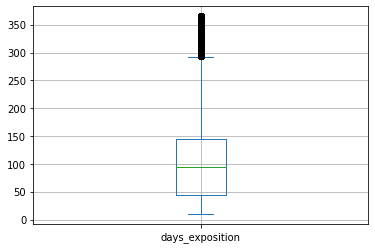

In [209]:
data.plot(x='apartment_type', y='days_exposition', kind='box', grid=True);

 ###  RQ 2 - Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 
 Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18951 entries, 0 to 23445
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18951 non-null  int64         
 1   last_price            18951 non-null  float64       
 2   total_area            18951 non-null  float64       
 3   first_day_exposition  18951 non-null  object        
 4   rooms                 18951 non-null  int64         
 5   ceiling_height        18951 non-null  float64       
 6   floors_total          18951 non-null  float64       
 7   living_area           18951 non-null  float64       
 8   floor                 18951 non-null  int64         
 9   is_apartment          18951 non-null  bool          
 10  studio                18951 non-null  bool          
 11  open_plan             18951 non-null  bool          
 12  kitchen_area          18951 non-null  float64       
 13  balcony         

,last_price,city_center_km,total_area_ok,kitchen_area,ceiling_height,parks_km,airport_dist_km
floor_type,,,,,,,
другой,4850000.0,13.0,52.0,9.9,2.7,0.46,28.0
первый,3900000.0,13.0,50.3,8.2,2.6,0.46,25.0
последний,4300000.0,13.0,52.8,8.5,2.7,0.46,25.0


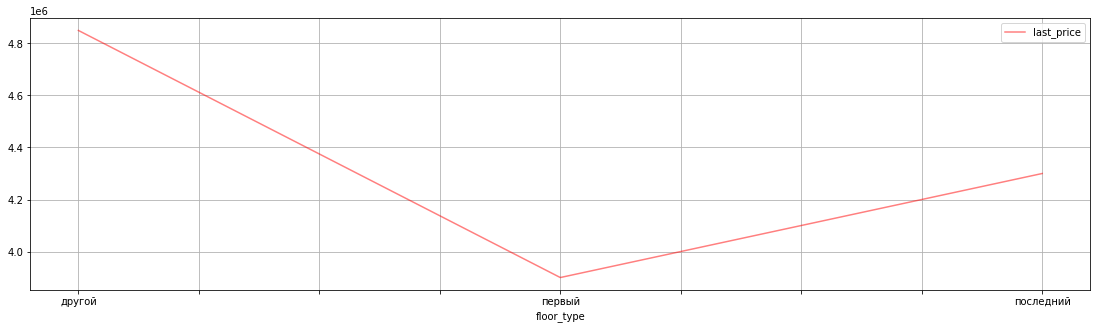

In [211]:
floor_type_grouped = data.groupby('floor_type')[['last_price', 'city_center_km', 'total_area_ok', 'kitchen_area', 'ceiling_height', 'parks_km', 'airport_dist_km']].agg('median').sort_values(by='city_center_km', ascending=False)
floor_type_grouped = floor_type_grouped.dropna()
display(floor_type_grouped)
# family_grouped = data_cleaned.groupby('family_status').agg({'debt': ['count', 'sum']})
floor_type_grouped.plot(y='last_price', kind='line', grid=True, figsize=(19,5), color='red', alpha=0.5);

In [212]:
location_grouped = data.groupby('location')[['last_price', 'floor', 'city_center_km', 'total_area_ok', 'kitchen_area', 'ceiling_height', 'parks_km', 'airport_dist_km']].agg('median').sort_values(by='city_center_km', ascending=False)
location_grouped = location_grouped.dropna()
display(location_grouped)

,last_price,floor,city_center_km,total_area_ok,kitchen_area,ceiling_height,parks_km,airport_dist_km
location,,,,,,,,
Зеленогорск,4250000.0,2.0,53.0,46.30,8.000,2.55,0.1475,72.0
Ломоносов,3321500.0,3.0,52.0,45.35,6.200,2.55,0.4070,48.0
Кронштадт,3595000.0,3.0,49.5,46.95,7.550,2.55,0.2930,68.0
Сестрорецк,5550000.0,3.5,35.0,59.75,10.200,2.70,0.3670,57.0
Петергоф,3745000.0,3.0,34.0,47.10,7.575,2.55,0.2940,39.0
Павловск,3760000.0,2.0,33.0,55.00,7.000,2.60,0.3120,21.0
Колпино,3625000.0,4.0,32.0,50.00,7.900,2.50,0.3930,26.0
Красное Село,3390000.0,4.0,29.0,45.00,7.000,2.60,0.4285,26.0
Пушкин,5100000.0,3.0,28.0,53.00,8.850,2.60,0.3995,16.0


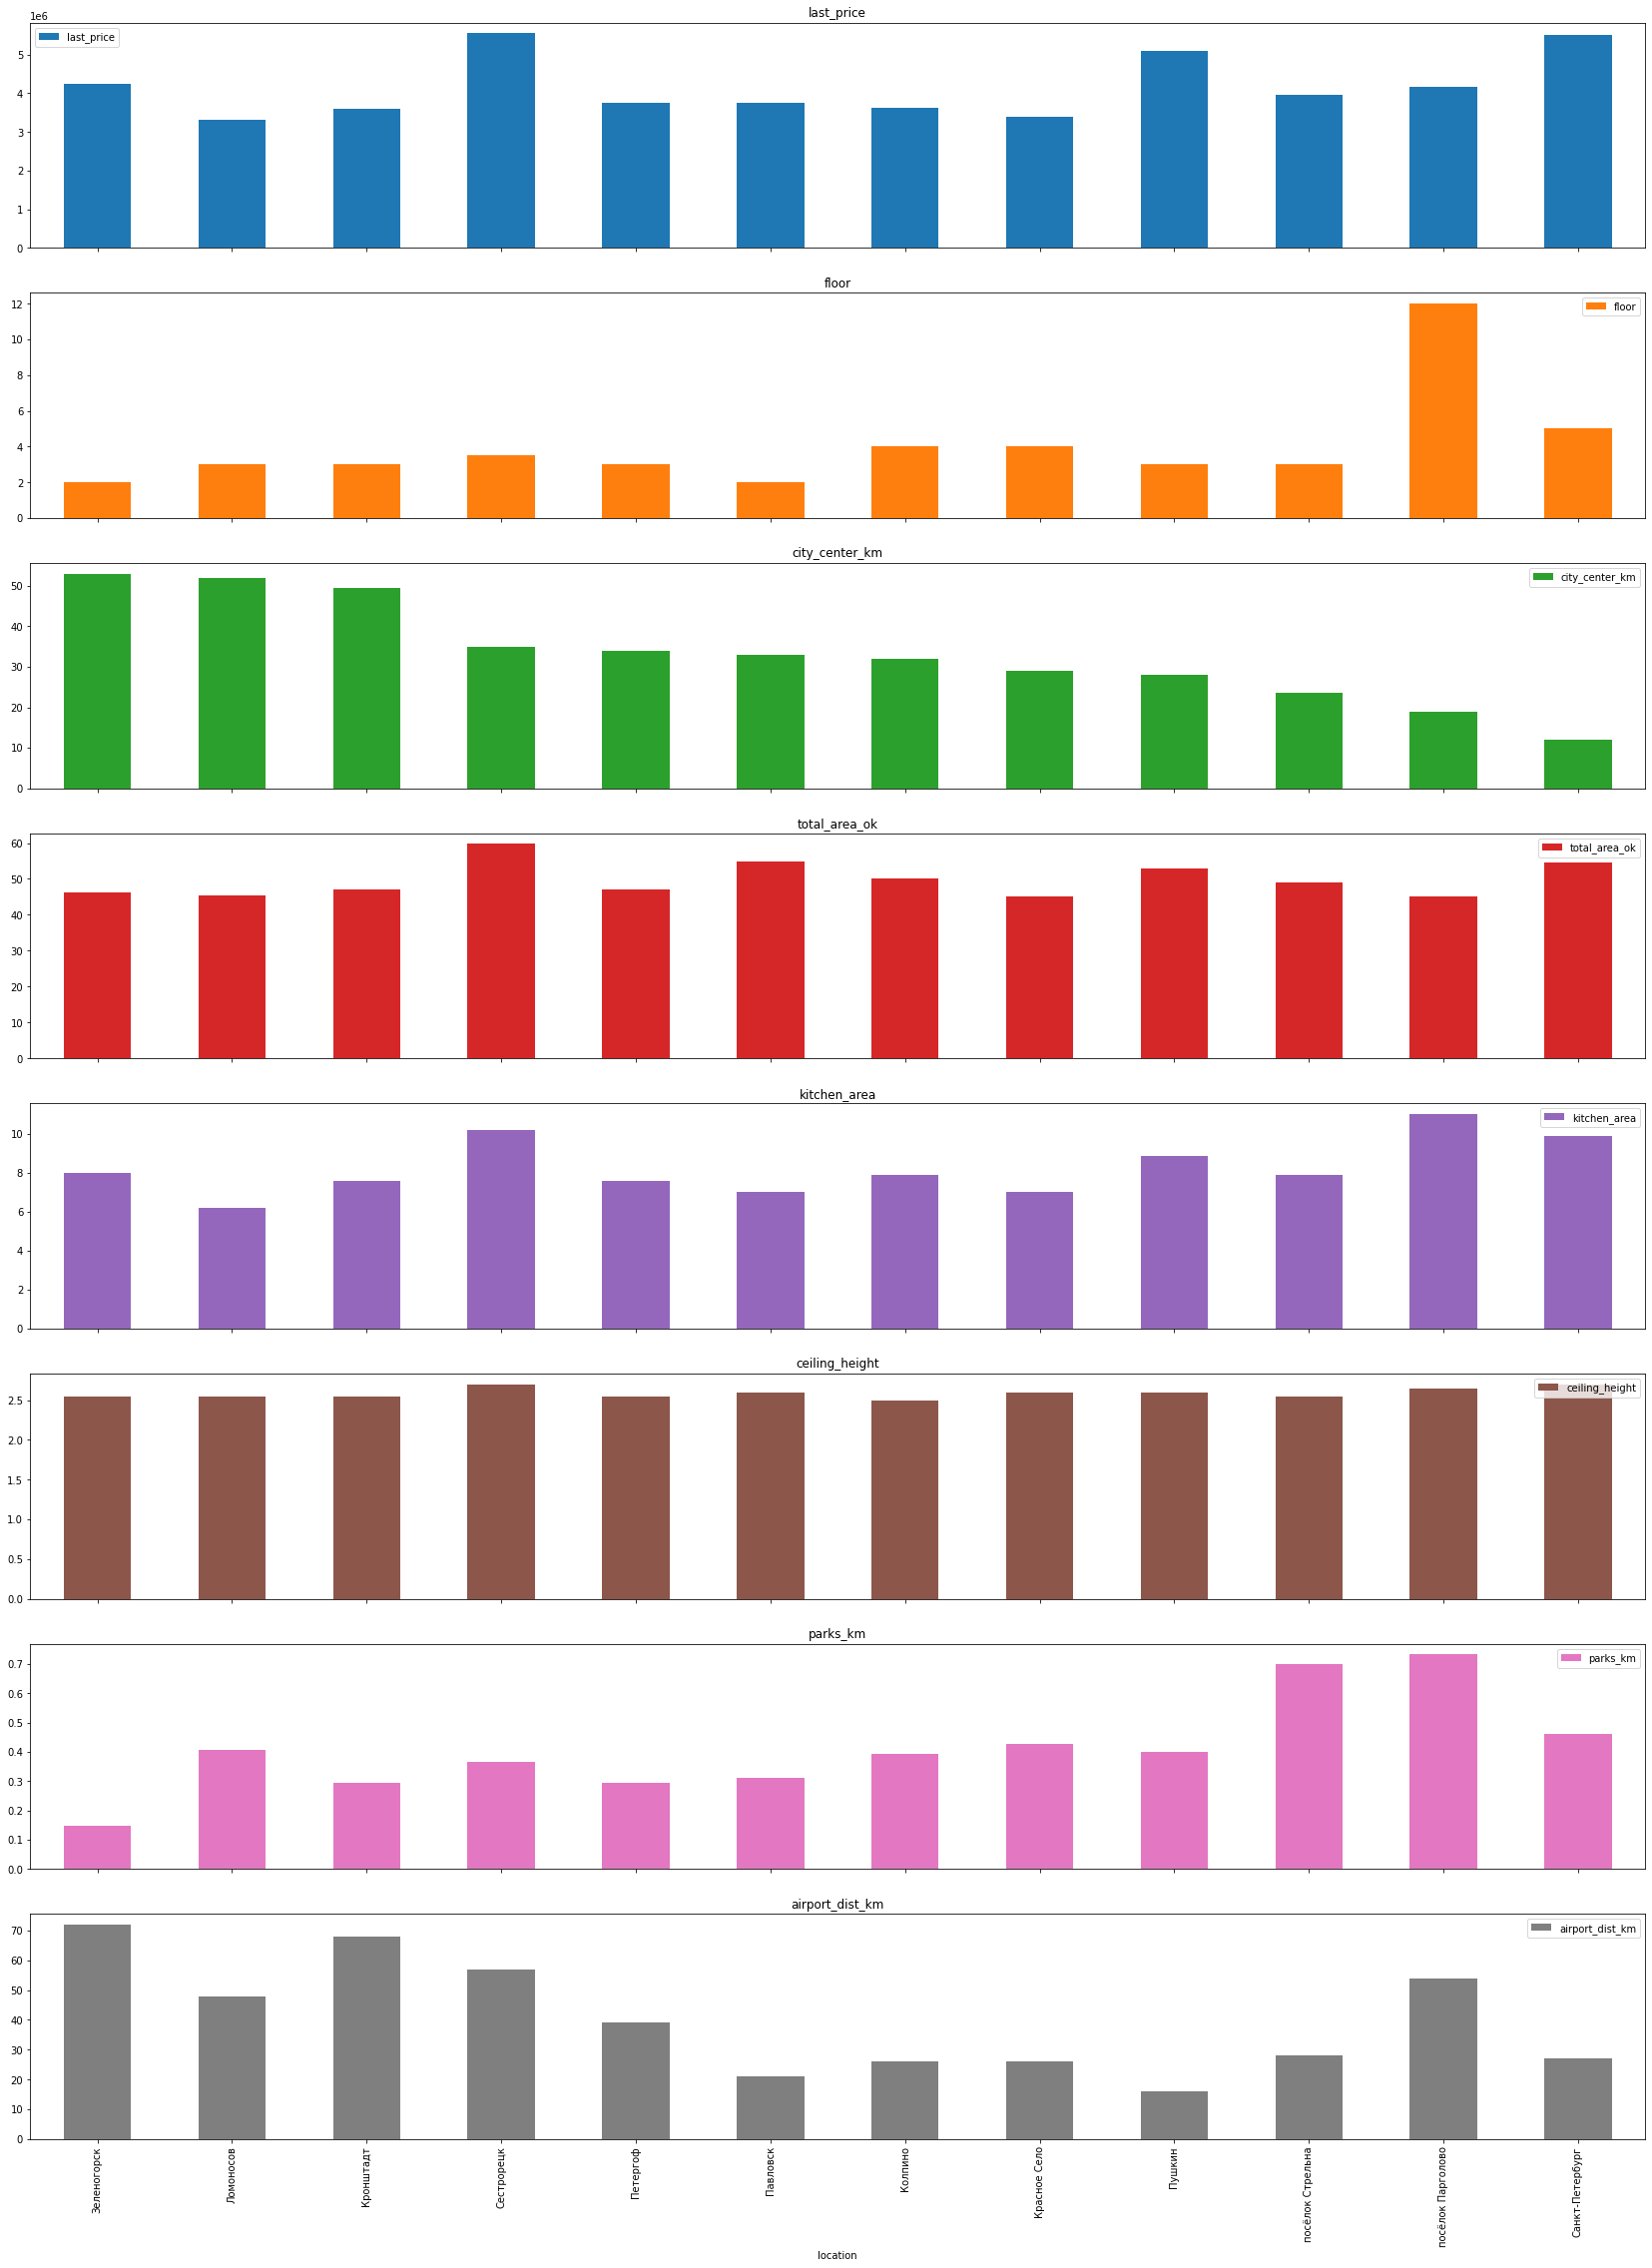

In [213]:
location_grouped.plot.bar(subplots=True, figsize=(29, 39));

- При удалении всех пропущенных значений получается непрезентативная выборка, но все равно интересно, так как можно получить общую картину данных.
- Непонятно, почему в Санкт-Петербурге медианное значение цены квартиры меньше, чем в Зеленегорске, Кронштадте, Парголово. Это может быть вызвано площадью продаваемой недвижимости.

_Исследуем зависимость цены от каждого показателя отдельно._

- **зависимость цены от общей площади:**

На цену влияет total_area_ok 0.7711307634689354


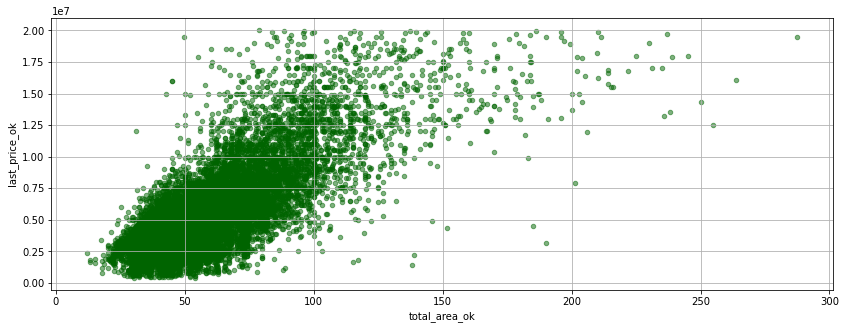

In [214]:
def correlation(regressor):
    print('На цену влияет', regressor , data['last_price_ok'].corr(data[regressor]))
    data.plot(x=regressor, y='last_price_ok', kind='scatter', color='darkgreen', grid=True, figsize=(14,5), alpha=0.5);

correlation('total_area_ok')

**Выводы:**
- самые популярные квартиры - малогабаритные от 18 до 90 кв. м общей площади, что является интуитивным выводом и соответствует реальному рынку готовой недвижимости в Санкт-Петербурге;
- коэффициент корреляции Пирсона положительно высокий (0.77), однако корреляция еще не является инференцией.

- **зависимость цены от жилой площади;**

На цену влияет living_area 0.6332271104695132


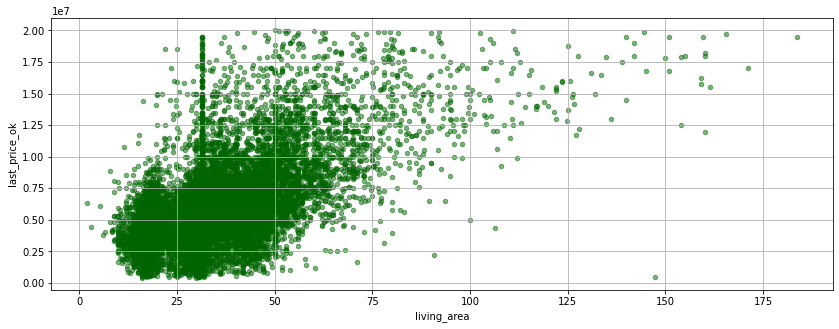

In [215]:
correlation('living_area')

**Вывод:**
- самые популярные квартиры - малогабаритные от 18 до 52 кв. м жилой площади, что является интуитивным выводом и соответствует реальному рынку готовой недвижимости в Санкт-Петербурге;
- коэффициент корреляции Пирсона высокий (0.63), однако корреляция еще не является инференцией.

- **зависимость цены от _площади кухни_;**

На цену влияет kitchen_area 0.5498059109280682


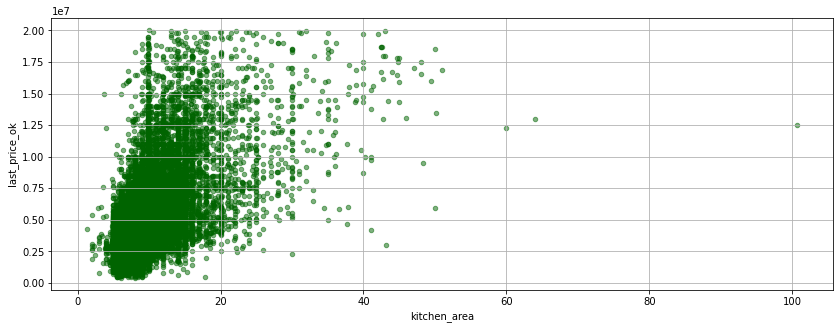

In [216]:
correlation('kitchen_area')

**Вывод:**
- из трех показателей площадей (общая площадь, жилая площадь, площадь кухни) меньший коэффициент корреляции медлу ценой и площадью - у площади кухни;
- кухни в продаваемых квартирах примерно одинаковой площади, что может говорить о том, что квартиры продаются в старых советстких домах, которые строились в одно советское время.

- **количества комнат;**

На цену влияет rooms 0.5081307631492482


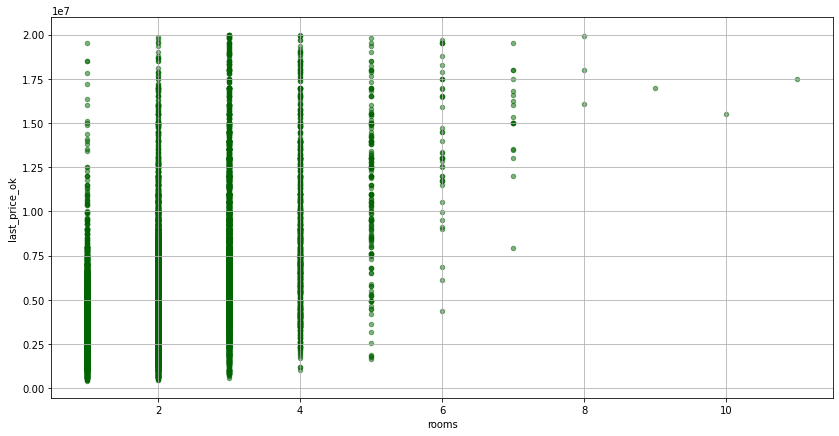

In [939]:
correlation('rooms')

Из графика видно, что зависимость цены от количества комнат слабо прослеживается. Она увеличивается, при возрастании комнат от 1 до 3. Очень много квартир от 1 до 6 комнат в диапазоне до 30 млн - это показывает что зависимость всетаки довольно слаба и уже в квартирах от 3 комнат уже отсутствует.

- **этажа, на котором расположена квартира (первый, последний, другой);**

На цену влияет floors_total 0.12801542572518654


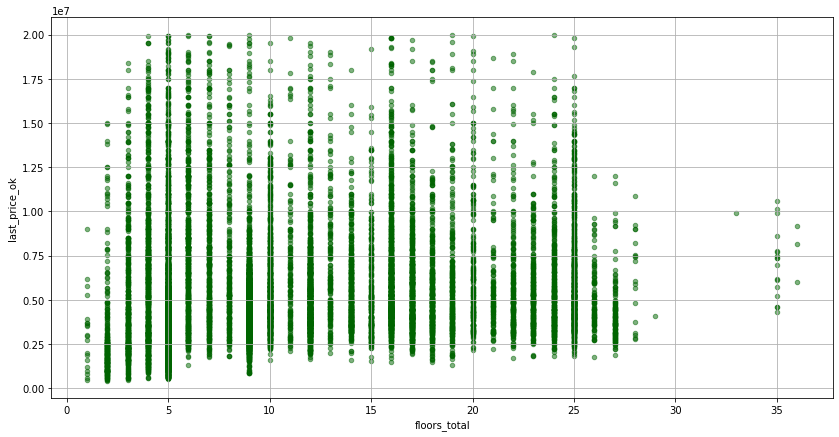

In [945]:
correlation('floors_total') # общее число этажей в доме

На цену влияет floor 0.09960075937393667


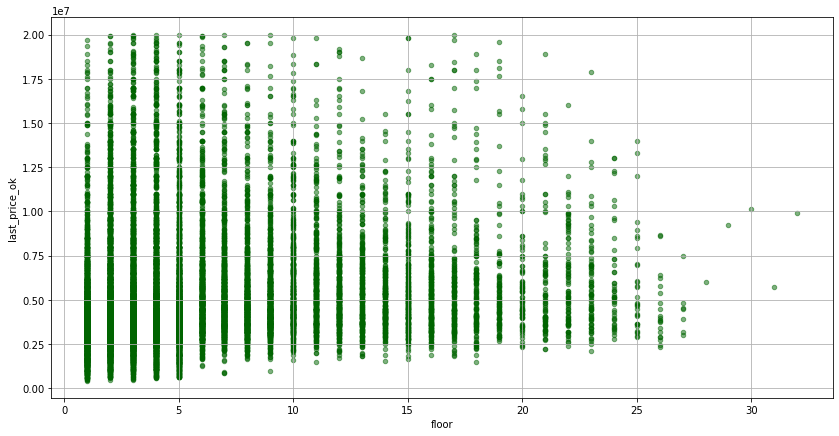

In [944]:
correlation('floor') # на каком этаже расположена квартира

**_По плотности распределения можно сделать вывод, что больше все продается квартир на 4 - 8 этажах, что соответствует предпочтениям большинства населения при покупке квартиры_.**

**Вычислим среднюю цену в каждой категории _floor_type_:**

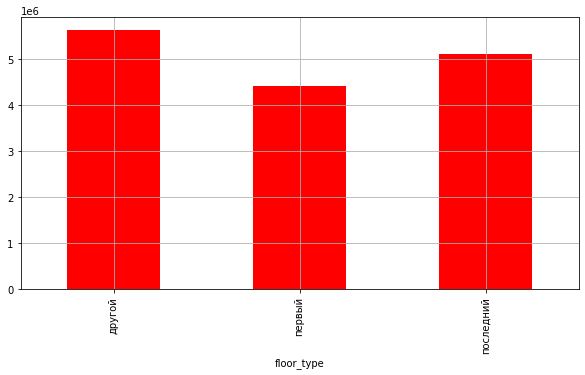

In [953]:
floor_type_mean = data.groupby('floor_type')['last_price_ok'].mean();
floor_type_mean.plot(x=floor_type_mean.index, y=floor_type_mean.values, color='red', kind='bar', grid=True, figsize=(10, 5));

**Выводы:**
- первый этаже стоит дешевле всех;
- последний этаж на втором месте по стоимости;
- самые дорогие и самые популярные у болишинства людей - это НЕ первый и НЕ последний этажи.

- **даты размещения (день недели, месяц, год).**

На цену влияет day -0.013496194597029627
На цену влияет date_month -0.00023534542063801677
На цену влияет date_year 0.021792819679223103


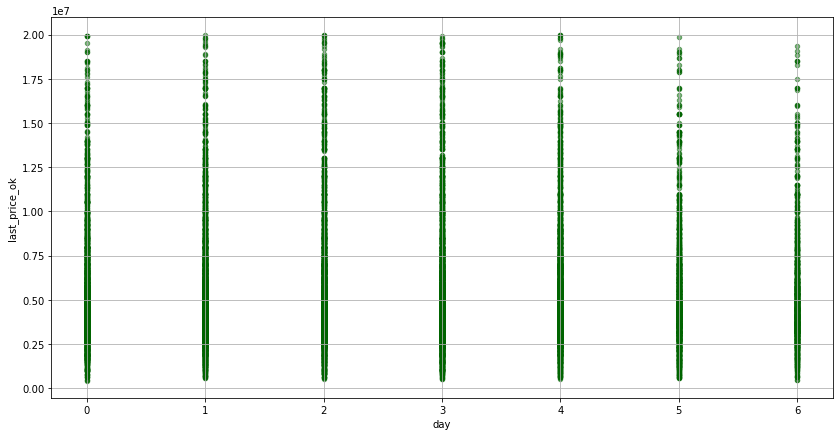

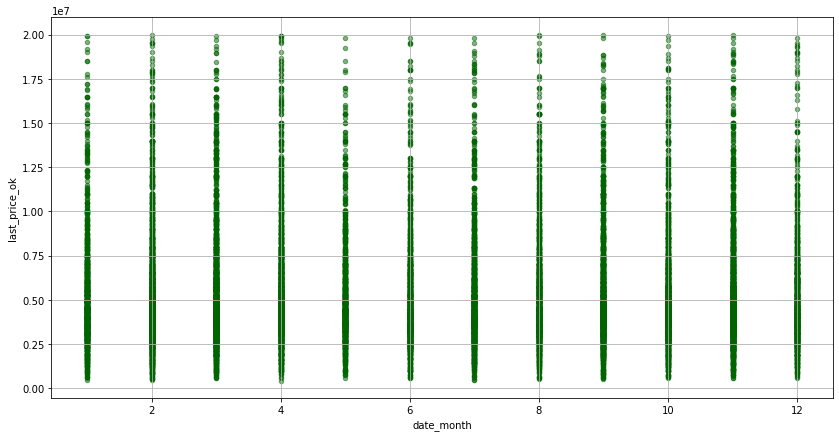

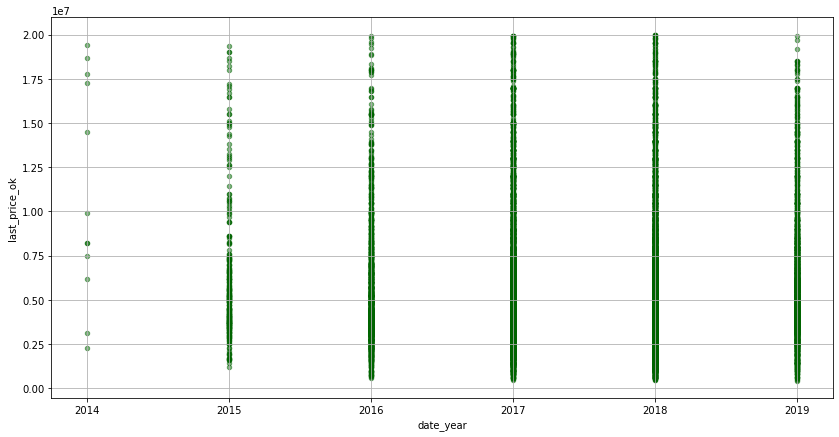

In [950]:
correlation('day')
correlation('date_month')
correlation('date_year')

**Вывод**
- положительная зависимость наблюдается между ценой и годом размещения объявления, что говорит о том, что цена недвижимости растет каждый год.

In [217]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'location', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'date_time', 'local_time',
       'total_images_ok', 'last_price_ok', 'total_area_ok', 'living_area_ok',
       'price_per_square', 'day', 'date_month', 'date_year', 'floor_type',
       'apartment_type', 'city_center_km', 'airport_dist_km', 'last_price_mln',
       'parks_km'],
      dtype='object')

На цену влияет 0.23737542139708565


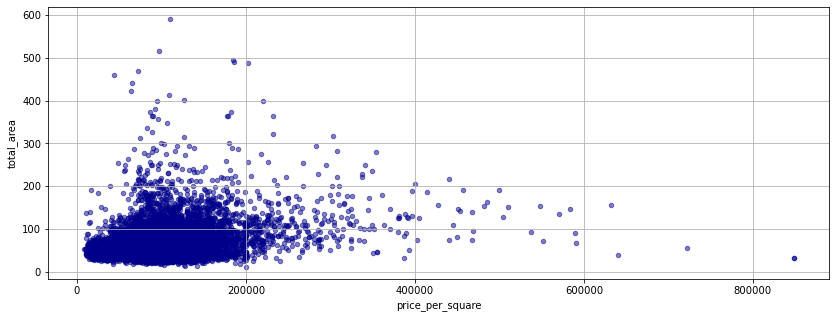

In [221]:
# Давайте рассмотрим динамику цены 1м2 и площади продаваемых квартир. 
# И потом пересмотрим выводы, т.к., возможно, упала не столько цена, сколько площадь продаваемых квартир?
print('На цену влияет', data['total_area'].corr(data['price_per_square']))
data.plot(x='price_per_square', y='total_area', kind='scatter', color='darkblue', grid=True, figsize=(14,5), alpha=0.5);

**ВЫВОД**
Зависимость между ценой за квадрат и общей площадью низкая (29%), что похоже на правду, ведь цена за квадрат определеляется другими факторами и точно НЕ общей площадью.

**Изучим динамику площади и цены за квадрат.**
**_Гипотеза:_** _проверить, снизилась ли площадью продаваемых квартир._ Возможно, это стало причиной падения цены, а не удешевление недвижимости в Санкт-Петербурге.

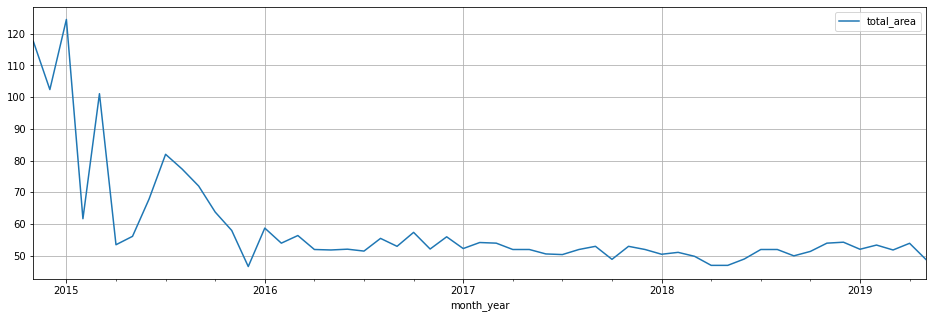

In [222]:
(
    data
    .pivot_table(index='month_year', values='total_area', aggfunc='median')
    .plot(grid=True, figsize=(16, 5))
);

**Вывод про динамику общей площади _total_area_:** тренд на снижение.

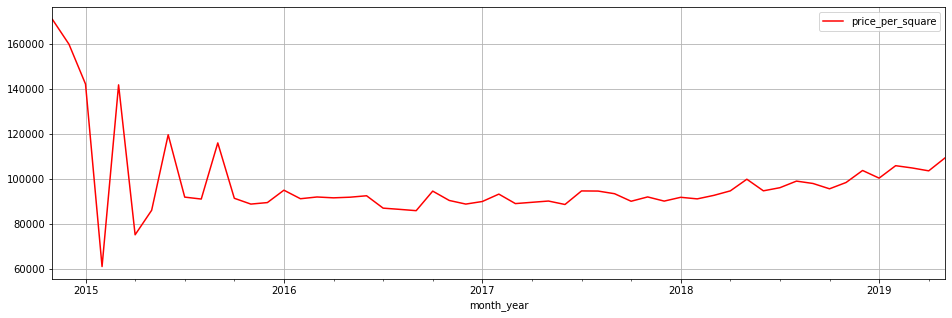

In [224]:
(
    data
    .pivot_table(index='month_year', values='price_per_square', aggfunc='median')
    .plot(grid=True, figsize=(16, 5), color='red')
);

**Вывод про динамику цены за квадрат _price_per_square_:** цена квадрата примерно одинакова.

**ВЫВОД**

Видим, что с 2015 по 2019 годы имеется очевидный тренд снижения площади продаваемых квартир. 

**Делаем вывод, что именно снижение количества продаваемых квадратных метров приводит к "удешевлению" недвижимости, о которой так все беспокоятся, а не снижение цены за квадрат.**

### RQ 3 - Средняя цена в зависимости от населенного пункта

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце _locality_name_.

**_Ранее мы почистили данные столбца _'locality_name'_ и теперь этот столбец называется _'locatiton'_.**

In [1013]:
location_top10 = data.groupby('location')['price_per_square'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
location_top10.reset_index(inplace=True)
print(location_top10)

# family_grouped = data_cleaned.groupby('family_status').agg({'debt': ['count', 'sum']})
# family_debt_quality = family_grouped['debt']['sum'] / family_grouped['debt']['count']
# family_debt_quality

            location  count           mean
0    Санкт-Петербург  12484  112124.467398
1     посёлок Мурино    412   85618.679612
2     посёлок Шушары    373   78702.651475
3         Всеволожск    329   69350.395137
4             Пушкин    295  102669.115254
5            Колпино    282   75003.099291
6  посёлок Парголово    263   89472.346008
7            Гатчина    244   68950.295082
8    деревня Кудрово    229   92345.899563
9             Выборг    201   58305.353234


In [978]:
print(location_top10[location_top10['mean'] == location_top10['mean'].min()])
print(location_top10[location_top10['mean'] == location_top10['mean'].max()])

  location  count          mean
9   Выборг    201  58305.353234
          location  count           mean
0  Санкт-Петербург  12484  112124.467398


**Выводы:**
- _Населенный пункт, где самая низкая стоимость жилья:_ **_Выборг_** cо средней ценой за квадрат = **58305 руб.**
- _Населенный пункт, где самая высокая стоимость жилья:_ **_Санкт-Петербург_** со средней ценой за квадрат = **112124 руб.**

### RQ 4 - Средняя цена каждого километра

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца _locality_name_ и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

**_Ранее мы подготовили данные, и теперь расстояние до центра города хранится в столбце _'city_center_km'_.**

,price_per_square,last_price,city_center_km,floor,kitchen_area,living_area,floors_total
7174,118868,6300000.0,2.0,3,7.7,33.0,4.0
5497,78699,7500000.0,4.0,4,20.5,55.3,4.0
825,130000,6500000.0,5.0,4,8.0,33.0,6.0
931,124844,7990000.0,10.0,10,8.6,38.7,12.0
7504,99057,5250000.0,10.0,2,7.1,37.1,5.0
11029,137293,4970000.0,10.0,7,10.6,18.1,12.0
10066,132543,6150000.0,12.0,6,9.9,31.3,9.0
11088,94862,4800000.0,12.0,7,7.0,30.7,12.0
2062,110512,4100000.0,13.0,3,9.9,18.7,18.0
12327,109980,5499000.0,13.0,8,8.0,31.0,9.0


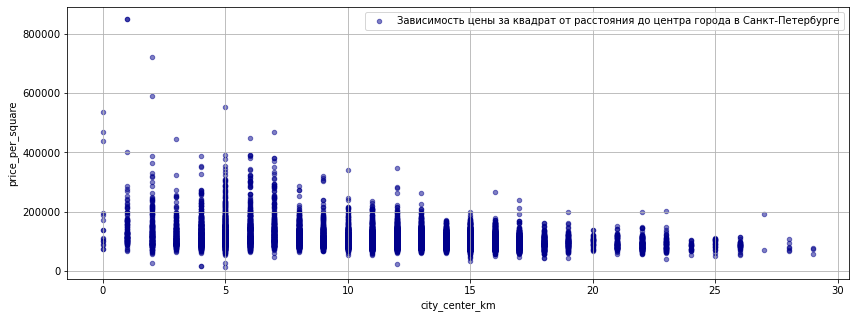

In [1064]:
# spb = data.loc[data['location'] == 'Санкт-Петербург',['price_per_square', 'city_center_km']].reset_index(drop=True)
spb = data.loc[data['location'] == 'Санкт-Петербург', ['price_per_square', 'last_price', 'city_center_km', 'floor', 'kitchen_area', 'living_area', 'floors_total']].reset_index(drop=True)
display(spb.sample(20).sort_values('city_center_km', ascending=True))
spb.plot(y='price_per_square', x='city_center_km', kind='scatter', color='darkblue', label='Зависимость цены за квадрат от расстояния до центра города в Санкт-Петербурге', grid=True, figsize=(14,5), alpha=0.5);

       last_price_mln  city_center_km
168                 5             5.0
11819              15             6.0
2353                4            10.0
8163                3            10.0
11855               4            11.0
11687               4            11.0
4276                4            11.0
946                 3            14.0
12438               8            18.0
6424                3            21.0


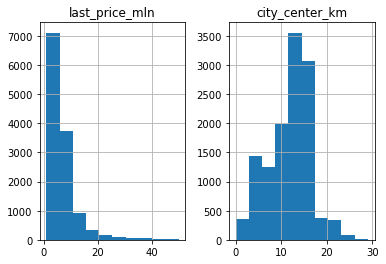

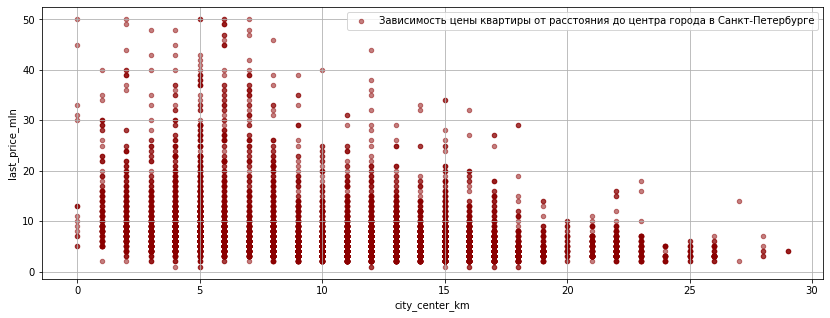

In [1320]:
spb_price = data.loc[data['location'] == 'Санкт-Петербург', ['last_price_mln', 'city_center_km']].reset_index(drop=True)
print(spb_price.sample(10).sort_values('city_center_km', ascending=True))
spb_price.hist()
spb_price.plot(y='last_price_mln', x='city_center_km', kind='scatter', color='darkred', label='Зависимость цены квартиры от расстояния до центра города в Санкт-Петербурге', grid=True, figsize=(14,5), alpha=0.5);

**ВЫВОД: чем меньше расстояние до центра Санкт-Петербурга, тем выше цена за квартиру и за квадратный метр.**

Добавим динамику цены относительно расстояния от центра.

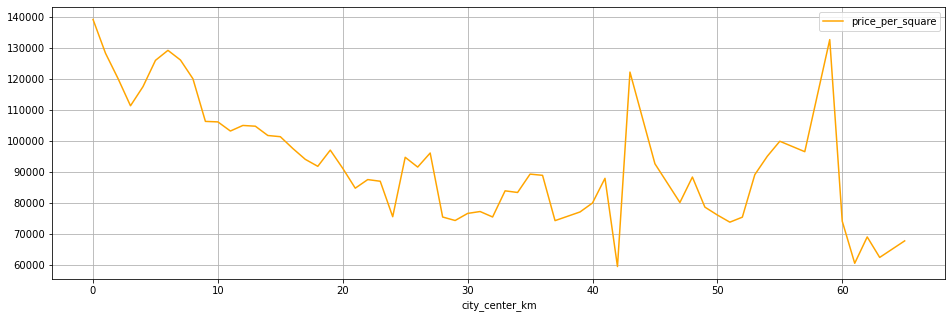

In [227]:
(
    data
    .pivot_table(index='city_center_km', values='price_per_square', aggfunc='median')
    .plot(grid=True, figsize=(16, 5), color='orange')
);

# Общие выводы

In [1009]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,last_price_ok,total_area_ok,price_per_square,day,date_month,date_year,city_center_km,airport_dist_km,last_price_mln,parks_km
count,18808.000000,1.880800e+04,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,18808.000000,...,1.835500e+04,18790.000000,18808.000000,18808.000000,18808.000000,18808.000000,14548.000000,14548.000000,18808.000000,14037.000000
mean,10.016642,5.965569e+06,58.899295,2.061835,2.695730,10.741014,33.309975,5.917110,10.279616,0.595438,...,5.411333e+06,58.588146,97663.596289,2.571831,6.361867,2017.547799,14.427000,29.029076,5.476340,0.480685
std,5.662631,4.852852e+06,30.021006,1.027590,0.211616,6.582755,18.432641,4.886165,5.075237,0.964480,...,3.158897e+06,28.242857,39224.294061,1.793375,3.493746,0.897911,8.531864,12.761457,4.877297,0.228004
min,0.000000,4.300000e+05,12.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,4.300000e+05,12.000000,9615.000000,0.000000,1.000000,2014.000000,0.000000,0.000000,0.000000,0.051000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.100000,0.000000,...,3.400000e+06,40.000000,76689.250000,1.000000,3.000000,2017.000000,10.000000,19.000000,3.000000,0.437000
50%,10.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.400000,4.000000,9.500000,0.000000,...,4.589000e+06,52.000000,94911.000000,3.000000,6.000000,2018.000000,13.000000,27.000000,4.000000,0.460000
75%,14.000000,6.700000e+06,68.325000,3.000000,2.700000,16.000000,40.722500,8.000000,11.300000,1.000000,...,6.500000e+06,68.200000,113731.000000,4.000000,10.000000,2018.000000,16.000000,37.000000,6.000000,0.460000
max,50.000000,5.078800e+07,517.000000,19.000000,4.800000,36.000000,332.000000,32.000000,100.700000,5.000000,...,1.999900e+07,297.500000,848485.000000,6.000000,12.000000,2019.000000,65.000000,84.000000,50.000000,3.190000


**В данных изначально было представлено 23699 наблюдений. После обработки каждого столбца, осталось 18808. Другими словами, после удаления аномальных значений 80% данных были использованы для исследования.**

**Квартиры в объявлениях были классифицированы по площади. Больше всего продается квартир <40 кв. и 40-60 кв. м, что соответствует одно- и небольщим двухкомнатным квартирам.** Это хорошо отражает текущую ситуацию на рынке недвижимости, где действительно мало, кто может позволить себе жилье большой площади.

**Самая низкая цена на квартиры в Выборе, самая высокая - в Санкт-Петербурге**. Это соответствует интуитивным ожиданиям и еще раз демонстрирует, где покупать жилье тем, кто хочет сэкономить.

**День и месяц недели отрицательно коррелируют со скоростью продаж квартиры.** Это контринтуитивно сезонности рынка недвижимости: чем ближе к новому году, тем больше должно продааться жилья, так как все хотят купить себе новое жилье до нового года, чтобы в новом году быть с жильем. Но данные говорят об обратном.

**Цена на квартиры действительно падает, как сообщают многие аналитические порталы недвижмости.** Однако _причина_ состоит не в том, что дешевеет квадратный метр, а в том, что **общая площадь продаваемых квартир стала меньше с 2015 по 2019 годы**, что приводит к арифметическому снижению итоговой цены в объявлениях.